In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [2]:
from tensorflow.keras.utils import to_categorical

- list1:  all the images in a single list in form of an array that will describe the pixels of the image
- list2: labels of the corresponding image

## To feed image data to the model we need to convert the pixels into an array

In [4]:
imgs_path = "img_class/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    print(img_path) 
    for img in os.listdir(img_path):
        print(img)
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

img_class/Train/0
00000_00005_00023.png
00000_00006_00017.png
00000_00006_00003.png
00000_00003_00018.png
00000_00003_00024.png
00000_00000_00010.png
00000_00000_00004.png
00000_00000_00005.png
00000_00000_00011.png
00000_00003_00025.png
00000_00003_00019.png
00000_00006_00002.png
00000_00006_00016.png
00000_00005_00022.png
00000_00005_00020.png
00000_00005_00008.png
00000_00006_00000.png
00000_00006_00014.png
00000_00006_00028.png
00000_00003_00027.png
00000_00000_00007.png
00000_00000_00013.png
00000_00000_00012.png
00000_00000_00006.png
00000_00003_00026.png
00000_00006_00029.png
00000_00006_00015.png
00000_00006_00001.png
00000_00005_00009.png
00000_00005_00021.png
00000_00005_00019.png
00000_00005_00025.png
00000_00006_00005.png
00000_00006_00011.png
00000_00003_00022.png
00000_00000_00002.png
00000_00000_00016.png
00000_00000_00017.png
00000_00000_00003.png
00000_00003_00023.png
00000_00006_00010.png
00000_00006_00004.png
00000_00005_00024.png
00000_00005_00018.png
00000_00005_00

00001_00000_00016.png
00001_00033_00010.png
00001_00022_00023.png
00001_00033_00004.png
00001_00065_00012.png
00001_00065_00006.png
00001_00060_00021.png
00001_00019_00029.png
00001_00071_00006.png
00001_00071_00012.png
00001_00019_00015.png
00001_00027_00004.png
00001_00036_00023.png
00001_00008_00026.png
00001_00060_00009.png
00001_00027_00010.png
00001_00019_00001.png
00001_00014_00016.png
00001_00042_00028.png
00001_00005_00025.png
00001_00014_00002.png
00001_00042_00014.png
00001_00005_00019.png
00001_00042_00000.png
00001_00053_00027.png
00001_00063_00015.png
00001_00072_00026.png
00001_00024_00018.png
00001_00063_00001.png
00001_00063_00029.png
00001_00035_00017.png
00001_00035_00003.png
00001_00024_00024.png
00001_00017_00022.png
00001_00038_00014.png
00001_00006_00005.png
00001_00041_00008.png
00001_00006_00011.png
00001_00038_00000.png
00001_00029_00027.png
00001_00050_00007.png
00001_00041_00020.png
00001_00038_00028.png
00001_00050_00013.png
00001_00050_00012.png
00001_0005

00001_00042_00011.png
00001_00053_00022.png
00001_00042_00005.png
00001_00014_00013.png
00001_00014_00007.png
00001_00005_00020.png
00001_00035_00012.png
00001_00024_00021.png
00001_00035_00006.png
00001_00024_00009.png
00001_00063_00010.png
00001_00063_00004.png
00001_00072_00023.png
00001_00041_00025.png
00001_00050_00002.png
00001_00050_00016.png
00001_00006_00028.png
00001_00038_00011.png
00001_00041_00019.png
00001_00006_00000.png
00001_00017_00027.png
00001_00029_00022.png
00001_00006_00014.png
00001_00038_00005.png
00001_00029_00023.png
00001_00038_00004.png
00001_00006_00015.png
00001_00041_00018.png
00001_00006_00001.png
00001_00038_00010.png
00001_00017_00026.png
00001_00050_00017.png
00001_00006_00029.png
00001_00041_00024.png
00001_00050_00003.png
00001_00063_00005.png
00001_00072_00022.png
00001_00024_00008.png
00001_00063_00011.png
00001_00024_00020.png
00001_00035_00007.png
00001_00035_00013.png
00001_00014_00006.png
00001_00005_00021.png
00001_00014_00012.png
00001_0005

00001_00035_00019.png
00001_00072_00000.png
00001_00063_00027.png
00001_00024_00016.png
00001_00072_00028.png
00001_00035_00025.png
00001_00024_00002.png
00001_00053_00029.png
00001_00005_00017.png
00001_00005_00003.png
00001_00014_00024.png
00001_00053_00015.png
00001_00042_00026.png
00001_00014_00018.png
00001_00053_00001.png
00001_00060_00007.png
00001_00008_00028.png
00001_00071_00020.png
00001_00060_00013.png
00001_00027_00022.png
00001_00036_00005.png
00001_00008_00014.png
00001_00008_00000.png
00001_00071_00008.png
00001_00036_00011.png
00001_00019_00027.png
00001_00065_00008.png
00001_00022_00011.png
00001_00022_00005.png
00001_00033_00022.png
00001_00065_00020.png
00001_00000_00018.png
00001_00047_00001.png
00001_00056_00026.png
00001_00068_00023.png
00001_00047_00015.png
00001_00000_00024.png
00001_00011_00003.png
00001_00011_00017.png
00001_00047_00029.png
00001_00030_00002.png
00001_00021_00025.png
00001_00066_00028.png
00001_00030_00016.png
00001_00021_00019.png
00001_0006

00001_00061_00002.png
00001_00061_00016.png
00001_00037_00028.png
00001_00009_00011.png
00001_00070_00019.png
00001_00037_00000.png
00001_00026_00027.png
00001_00018_00022.png
00001_00037_00014.png
00001_00009_00005.png
00001_00061_00012.png
00001_00061_00006.png
00001_00009_00029.png
00001_00070_00021.png
00001_00009_00001.png
00001_00070_00009.png
00001_00037_00010.png
00001_00018_00026.png
00001_00026_00023.png
00001_00037_00004.png
00001_00009_00015.png
00001_00004_00002.png
00001_00015_00025.png
00001_00052_00028.png
00001_00004_00016.png
00001_00043_00027.png
00001_00015_00019.png
00001_00052_00000.png
00001_00052_00014.png
00001_00034_00018.png
00001_00073_00001.png
00001_00062_00026.png
00001_00073_00015.png
00001_00034_00024.png
00001_00025_00003.png
00001_00025_00017.png
00001_00073_00029.png
00001_00039_00027.png
00001_00028_00000.png
00001_00051_00008.png
00001_00016_00011.png
00001_00016_00005.png
00001_00028_00014.png
00001_00007_00022.png
00001_00040_00013.png
00001_0002

00002_00074_00010.png
00002_00022_00006.png
00002_00033_00021.png
00002_00022_00012.png
00002_00012_00020.png
00002_00003_00007.png
00002_00003_00013.png
00002_00055_00005.png
00002_00044_00022.png
00002_00012_00008.png
00002_00055_00011.png
00002_00066_00017.png
00002_00058_00006.png
00002_00049_00021.png
00002_00030_00029.png
00002_00058_00012.png
00002_00066_00003.png
00002_00030_00015.png
00002_00049_00009.png
00002_00030_00001.png
00002_00021_00026.png
00002_00035_00026.png
00002_00063_00018.png
00002_00024_00001.png
00002_00024_00015.png
00002_00072_00003.png
00002_00063_00024.png
00002_00024_00029.png
00002_00072_00017.png
00002_00006_00008.png
00002_00041_00011.png
00002_00038_00019.png
00002_00050_00022.png
00002_00041_00005.png
00002_00038_00025.png
00002_00017_00013.png
00002_00029_00002.png
00002_00029_00016.png
00002_00017_00007.png
00002_00006_00020.png
00002_00036_00012.png
00002_00008_00003.png
00002_00019_00024.png
00002_00027_00021.png
00002_00008_00017.png
00002_0003

00002_00048_00022.png
00002_00059_00005.png
00002_00067_00014.png
00002_00048_00023.png
00002_00067_00015.png
00002_00059_00004.png
00002_00059_00010.png
00002_00067_00001.png
00002_00020_00018.png
00002_00031_00017.png
00002_00067_00029.png
00002_00020_00024.png
00002_00031_00003.png
00002_00002_00005.png
00002_00013_00022.png
00002_00002_00011.png
00002_00045_00008.png
00002_00045_00020.png
00002_00054_00007.png
00002_00054_00013.png
00002_00064_00021.png
00002_00032_00023.png
00002_00023_00004.png
00002_00023_00010.png
00002_00064_00009.png
00002_00046_00028.png
00002_00010_00016.png
00002_00010_00002.png
00002_00001_00025.png
00002_00046_00014.png
00002_00069_00022.png
00002_00057_00027.png
00002_00046_00000.png
00002_00001_00019.png
00002_00052_00000.png
00002_00015_00019.png
00002_00043_00027.png
00002_00052_00014.png
00002_00015_00025.png
00002_00004_00002.png
00002_00004_00016.png
00002_00052_00028.png
00002_00018_00026.png
00002_00037_00010.png
00002_00070_00009.png
00002_0000

00002_00007_00016.png
00002_00040_00027.png
00002_00016_00019.png
00002_00051_00000.png
00002_00028_00008.png
00002_00051_00014.png
00002_00037_00018.png
00002_00070_00001.png
00002_00009_00009.png
00002_00061_00026.png
00002_00070_00015.png
00002_00037_00024.png
00002_00026_00003.png
00002_00018_00012.png
00002_00018_00006.png
00002_00026_00017.png
00002_00070_00029.png
00002_00009_00021.png
00002_00052_00008.png
00002_00015_00011.png
00002_00015_00005.png
00002_00004_00022.png
00002_00043_00013.png
00002_00052_00020.png
00002_00043_00007.png
00002_00057_00007.png
00002_00069_00016.png
00002_00046_00020.png
00002_00069_00002.png
00002_00057_00013.png
00002_00010_00022.png
00002_00001_00005.png
00002_00046_00008.png
00002_00001_00011.png
00002_00064_00029.png
00002_00032_00017.png
00002_00032_00003.png
00002_00023_00024.png
00002_00064_00015.png
00002_00023_00018.png
00002_00064_00001.png
00002_00045_00014.png
00002_00002_00019.png
00002_00045_00000.png
00002_00054_00027.png
00002_0001

00002_00026_00013.png
00002_00018_00002.png
00002_00018_00016.png
00002_00026_00007.png
00002_00037_00020.png
00002_00007_00012.png
00002_00039_00003.png
00002_00028_00024.png
00002_00016_00021.png
00002_00039_00017.png
00002_00007_00006.png
00002_00016_00009.png
00002_00051_00010.png
00002_00028_00018.png
00002_00051_00004.png
00002_00040_00023.png
00002_00073_00025.png
00002_00062_00002.png
00002_00062_00016.png
00002_00034_00028.png
00002_00073_00019.png
00002_00034_00000.png
00002_00025_00027.png
00002_00034_00014.png
00002_00011_00022.png
00002_00000_00005.png
00002_00047_00008.png
00002_00000_00011.png
00002_00068_00016.png
00002_00056_00007.png
00002_00047_00020.png
00002_00056_00013.png
00002_00068_00002.png
00002_00065_00015.png
00002_00074_00026.png
00002_00022_00018.png
00002_00065_00001.png
00002_00065_00029.png
00002_00033_00017.png
00002_00033_00003.png
00002_00022_00024.png
00002_00012_00016.png
00002_00044_00028.png
00002_00003_00025.png
00002_00012_00002.png
00002_0004

00002_00042_00017.png
00002_00005_00026.png
00002_00053_00018.png
00002_00014_00001.png
00002_00014_00015.png
00002_00008_00025.png
00002_00019_00002.png
00002_00027_00013.png
00002_00027_00007.png
00002_00019_00016.png
00002_00036_00020.png
00002_00008_00019.png
00002_00036_00008.png
00002_00071_00011.png
00002_00060_00022.png
00002_00071_00005.png
00002_00029_00018.png
00002_00017_00009.png
00002_00050_00010.png
00002_00050_00004.png
00002_00041_00023.png
00002_00038_00003.png
00002_00006_00012.png
00002_00029_00024.png
00002_00017_00021.png
00002_00006_00006.png
00002_00038_00017.png
00002_00072_00019.png
00002_00035_00000.png
00002_00024_00027.png
00002_00035_00014.png
00002_00072_00025.png
00002_00063_00002.png
00002_00063_00016.png
00002_00035_00028.png
00002_00021_00028.png
00002_00058_00020.png
00002_00049_00007.png
00002_00049_00013.png
00002_00066_00025.png
00002_00021_00014.png
00002_00030_00027.png
00002_00066_00019.png
00002_00021_00000.png
00002_00058_00008.png
00002_0001

00003_00022_00002.png
00003_00033_00019.png
00003_00011_00004.png
00003_00000_00023.png
00003_00011_00010.png
00003_00042_00009.png
00003_00005_00010.png
00003_00014_00023.png
00003_00005_00004.png
00003_00042_00021.png
00003_00019_00008.png
00003_00027_00019.png
00003_00008_00013.png
00003_00036_00002.png
00003_00027_00025.png
00003_00019_00020.png
00003_00036_00016.png
00003_00008_00007.png
00003_00006_00024.png
00003_00029_00012.png
00003_00017_00003.png
00003_00017_00017.png
00003_00029_00006.png
00003_00038_00021.png
00003_00041_00029.png
00003_00038_00009.png
00003_00006_00018.png
00003_00041_00001.png
00003_00041_00015.png
00003_00024_00011.png
00003_00024_00005.png
00003_00035_00022.png
00003_00024_00013.png
00003_00035_00020.png
00003_00024_00007.png
00003_00035_00008.png
00003_00041_00003.png
00003_00041_00017.png
00003_00017_00029.png
00003_00017_00001.png
00003_00029_00010.png
00003_00006_00026.png
00003_00038_00023.png
00003_00029_00004.png
00003_00017_00015.png
00003_0002

00003_00012_00016.png
00003_00044_00028.png
00003_00003_00025.png
00003_00012_00002.png
00003_00021_00004.png
00003_00030_00023.png
00003_00021_00010.png
00003_00021_00011.png
00003_00021_00005.png
00003_00030_00022.png
00003_00003_00024.png
00003_00012_00003.png
00003_00012_00017.png
00003_00044_00029.png
00003_00003_00018.png
00003_00044_00001.png
00003_00044_00015.png
00003_00022_00019.png
00003_00033_00002.png
00003_00022_00025.png
00003_00033_00016.png
00003_00000_00010.png
00003_00011_00023.png
00003_00000_00004.png
00003_00042_00006.png
00003_00042_00012.png
00003_00014_00004.png
00003_00005_00023.png
00003_00014_00010.png
00003_00027_00016.png
00003_00019_00007.png
00003_00008_00020.png
00003_00036_00025.png
00003_00019_00013.png
00003_00027_00002.png
00003_00008_00008.png
00003_00036_00019.png
00003_00041_00026.png
00003_00029_00009.png
00003_00017_00018.png
00003_00029_00021.png
00003_00006_00017.png
00003_00038_00006.png
00003_00038_00012.png
00003_00006_00003.png
00003_0001

00004_00059_00007.png
00004_00059_00013.png
00004_00031_00014.png
00004_00020_00027.png
00004_00048_00008.png
00004_00031_00000.png
00004_00062_00019.png
00004_00025_00000.png
00004_00034_00027.png
00004_00025_00014.png
00004_00062_00025.png
00004_00025_00028.png
00004_00007_00009.png
00004_00040_00010.png
00004_00039_00018.png
00004_00040_00004.png
00004_00051_00023.png
00004_00016_00012.png
00004_00028_00003.png
00004_00039_00024.png
00004_00007_00021.png
00004_00028_00017.png
00004_00016_00006.png
00004_00018_00025.png
00004_00037_00013.png
00004_00009_00002.png
00004_00009_00016.png
00004_00037_00007.png
00004_00026_00020.png
00004_00026_00008.png
00004_00061_00011.png
00004_00018_00019.png
00004_00061_00005.png
00004_00052_00003.png
00004_00043_00024.png
00004_00004_00029.png
00004_00052_00017.png
00004_00015_00026.png
00004_00043_00018.png
00004_00004_00001.png
00004_00004_00015.png
00004_00004_00014.png
00004_00015_00027.png
00004_00043_00019.png
00004_00004_00000.png
00004_0000

00004_00024_00000.png
00004_00035_00027.png
00004_00024_00014.png
00004_00029_00003.png
00004_00017_00012.png
00004_00038_00024.png
00004_00006_00021.png
00004_00017_00006.png
00004_00029_00017.png
00004_00038_00018.png
00004_00006_00009.png
00004_00041_00010.png
00004_00041_00004.png
00004_00050_00023.png
00004_00019_00019.png
00004_00027_00008.png
00004_00060_00011.png
00004_00060_00005.png
00004_00019_00025.png
00004_00008_00002.png
00004_00036_00013.png
00004_00036_00007.png
00004_00008_00016.png
00004_00027_00020.png
00004_00014_00026.png
00004_00042_00018.png
00004_00005_00001.png
00004_00005_00015.png
00004_00053_00003.png
00004_00042_00024.png
00004_00005_00029.png
00004_00053_00017.png
00004_00047_00017.png
00004_00011_00029.png
00004_00056_00024.png
00004_00047_00003.png
00004_00011_00015.png
00004_00056_00018.png
00004_00011_00001.png
00004_00000_00026.png
00004_00033_00020.png
00004_00022_00007.png
00004_00022_00013.png
00004_00065_00022.png
00004_00033_00008.png
00004_0004

00004_00008_00012.png
00004_00036_00003.png
00004_00036_00017.png
00004_00008_00006.png
00004_00019_00021.png
00004_00060_00029.png
00004_00029_00013.png
00004_00017_00002.png
00004_00006_00025.png
00004_00038_00020.png
00004_00041_00028.png
00004_00017_00016.png
00004_00029_00007.png
00004_00050_00027.png
00004_00038_00008.png
00004_00006_00019.png
00004_00041_00000.png
00004_00041_00014.png
00004_00063_00021.png
00004_00063_00009.png
00004_00024_00010.png
00004_00035_00023.png
00004_00024_00004.png
00004_00063_00004.png
00004_00063_00010.png
00004_00024_00009.png
00004_00024_00021.png
00004_00035_00006.png
00004_00035_00012.png
00004_00029_00022.png
00004_00038_00005.png
00004_00006_00014.png
00004_00006_00000.png
00004_00041_00019.png
00004_00038_00011.png
00004_00017_00027.png
00004_00050_00016.png
00004_00006_00028.png
00004_00041_00025.png
00004_00050_00002.png
00004_00027_00029.png
00004_00060_00024.png
00004_00019_00004.png
00004_00027_00015.png
00004_00008_00023.png
00004_0003

00004_00041_00009.png
00004_00038_00001.png
00004_00029_00026.png
00004_00050_00006.png
00004_00041_00021.png
00004_00038_00029.png
00004_00050_00012.png
00004_00063_00014.png
00004_00063_00000.png
00004_00024_00019.png
00004_00063_00028.png
00004_00035_00016.png
00004_00035_00002.png
00004_00024_00025.png
00004_00001_00013.png
00004_00010_00020.png
00004_00001_00007.png
00004_00057_00011.png
00004_00010_00008.png
00004_00057_00005.png
00004_00046_00022.png
00004_00064_00003.png
00004_00064_00017.png
00004_00032_00029.png
00004_00032_00001.png
00004_00023_00026.png
00004_00032_00015.png
00004_00002_00027.png
00004_00013_00000.png
00004_00054_00019.png
00004_00013_00014.png
00004_00045_00002.png
00004_00054_00025.png
00004_00013_00028.png
00004_00045_00016.png
00004_00031_00009.png
00004_00048_00001.png
00004_00059_00026.png
00004_00048_00015.png
00004_00020_00012.png
00004_00020_00006.png
00004_00031_00021.png
00004_00048_00029.png
00004_00025_00021.png
00004_00034_00006.png
00004_0003

00005_00047_00011.png
00005_00000_00008.png
00005_00011_00007.png
00005_00000_00020.png
00005_00011_00013.png
00005_00022_00015.png
00005_00033_00026.png
00005_00022_00001.png
00005_00022_00029.png
00005_00055_00016.png
00005_00003_00028.png
00005_00044_00025.png
00005_00055_00002.png
00005_00003_00014.png
00005_00003_00000.png
00005_00044_00019.png
00005_00012_00027.png
00005_00021_00021.png
00005_00058_00029.png
00005_00030_00006.png
00005_00030_00012.png
00005_00058_00015.png
00005_00049_00026.png
00005_00021_00009.png
00005_00058_00001.png
00005_00035_00009.png
00005_00024_00012.png
00005_00024_00006.png
00005_00035_00021.png
00005_00006_00027.png
00005_00029_00011.png
00005_00017_00000.png
00005_00050_00019.png
00005_00017_00014.png
00005_00029_00005.png
00005_00038_00022.png
00005_00041_00002.png
00005_00050_00025.png
00005_00017_00028.png
00005_00041_00016.png
00005_00060_00003.png
00005_00060_00017.png
00005_00036_00029.png
00005_00008_00010.png
00005_00036_00001.png
00005_0002

00005_00015_00020.png
00005_00004_00007.png
00005_00010_00007.png
00005_00001_00020.png
00005_00010_00013.png
00005_00057_00022.png
00005_00046_00005.png
00005_00046_00011.png
00005_00001_00008.png
00005_00023_00029.png
00005_00023_00015.png
00005_00032_00026.png
00005_00023_00001.png
00005_00002_00014.png
00005_00002_00000.png
00005_00045_00019.png
00005_00013_00027.png
00005_00054_00016.png
00005_00002_00028.png
00005_00045_00025.png
00005_00054_00002.png
00005_00059_00015.png
00005_00048_00026.png
00005_00059_00001.png
00005_00020_00009.png
00005_00059_00029.png
00005_00020_00021.png
00005_00031_00006.png
00005_00031_00012.png
00005_00031_00013.png
00005_00020_00020.png
00005_00059_00028.png
00005_00031_00007.png
00005_00048_00027.png
00005_00020_00008.png
00005_00059_00000.png
00005_00059_00014.png
00005_00045_00024.png
00005_00054_00003.png
00005_00054_00017.png
00005_00002_00029.png
00005_00002_00001.png
00005_00045_00018.png
00005_00013_00026.png
00005_00002_00015.png
00005_0003

00005_00037_00009.png
00005_00009_00018.png
00005_00061_00023.png
00005_00026_00012.png
00005_00018_00003.png
00005_00009_00024.png
00005_00037_00021.png
00005_00018_00017.png
00005_00026_00006.png
00005_00028_00025.png
00005_00007_00013.png
00005_00039_00002.png
00005_00039_00016.png
00005_00007_00007.png
00005_00016_00020.png
00005_00016_00008.png
00005_00051_00011.png
00005_00028_00019.png
00005_00040_00022.png
00005_00051_00005.png
00005_00034_00029.png
00005_00025_00026.png
00005_00034_00001.png
00005_00034_00015.png
00005_00034_00003.png
00005_00025_00024.png
00005_00034_00017.png
00005_00025_00018.png
00005_00051_00013.png
00005_00051_00007.png
00005_00039_00028.png
00005_00040_00020.png
00005_00039_00000.png
00005_00007_00011.png
00005_00040_00008.png
00005_00028_00027.png
00005_00016_00022.png
00005_00007_00005.png
00005_00039_00014.png
00005_00009_00026.png
00005_00018_00001.png
00005_00026_00010.png
00005_00061_00009.png
00005_00026_00004.png
00005_00018_00015.png
00005_0003

00005_00058_00021.png
00005_00049_00012.png
00005_00021_00015.png
00005_00021_00001.png
00005_00058_00009.png
00005_00030_00026.png
00005_00003_00020.png
00005_00012_00007.png
00005_00012_00013.png
00005_00044_00005.png
00005_00055_00022.png
00005_00003_00008.png
00005_00044_00011.png
00005_00022_00009.png
00005_00033_00006.png
00005_00022_00021.png
00005_00033_00012.png
00005_00000_00014.png
00005_00011_00027.png
00005_00047_00019.png
00005_00000_00000.png
00005_00000_00028.png
00005_00056_00016.png
00005_00056_00002.png
00005_00047_00025.png
00005_00056_00014.png
00005_00047_00027.png
00005_00056_00000.png
00005_00011_00019.png
00005_00056_00028.png
00005_00000_00016.png
00005_00000_00002.png
00005_00011_00025.png
00005_00022_00023.png
00005_00033_00004.png
00005_00033_00010.png
00005_00055_00020.png
00005_00044_00007.png
00005_00044_00013.png
00005_00012_00005.png
00005_00003_00022.png
00005_00012_00011.png
00005_00055_00008.png
00005_00021_00017.png
00005_00030_00024.png
00005_0002

00006_00008_00027.png
00006_00005_00024.png
00006_00005_00018.png
00006_00006_00004.png
00006_00006_00010.png
00006_00006_00011.png
00006_00006_00005.png
00006_00005_00019.png
00006_00005_00025.png
00006_00008_00026.png
00006_00000_00016.png
00006_00011_00025.png
00006_00000_00002.png
00006_00011_00019.png
00006_00003_00022.png
00006_00012_00005.png
00006_00012_00011.png
00006_00003_00013.png
00006_00012_00020.png
00006_00003_00007.png
00006_00012_00008.png
00006_00000_00027.png
00006_00011_00000.png
00006_00011_00014.png
00006_00011_00028.png
00006_00008_00017.png
00006_00008_00003.png
00006_00005_00028.png
00006_00005_00014.png
00006_00005_00000.png
00006_00006_00008.png
00006_00006_00020.png
00006_00006_00021.png
00006_00006_00009.png
00006_00005_00001.png
00006_00005_00015.png
00006_00005_00029.png
00006_00008_00002.png
00006_00008_00016.png
00006_00011_00029.png
00006_00011_00015.png
00006_00000_00026.png
00006_00011_00001.png
00006_00012_00009.png
00006_00012_00021.png
00006_0000

00007_00035_00010.png
00007_00029_00020.png
00007_00038_00007.png
00007_00006_00016.png
00007_00006_00002.png
00007_00038_00013.png
00007_00017_00025.png
00007_00041_00027.png
00007_00017_00019.png
00007_00029_00008.png
00007_00044_00000.png
00007_00003_00019.png
00007_00044_00014.png
00007_00003_00025.png
00007_00012_00002.png
00007_00012_00016.png
00007_00044_00028.png
00007_00021_00010.png
00007_00021_00004.png
00007_00030_00023.png
00007_00047_00020.png
00007_00000_00011.png
00007_00047_00008.png
00007_00011_00022.png
00007_00000_00005.png
00007_00033_00003.png
00007_00022_00024.png
00007_00033_00017.png
00007_00022_00018.png
00007_00022_00019.png
00007_00033_00016.png
00007_00033_00002.png
00007_00022_00025.png
00007_00011_00023.png
00007_00000_00004.png
00007_00000_00010.png
00007_00047_00009.png
00007_00047_00021.png
00007_00021_00005.png
00007_00030_00022.png
00007_00021_00011.png
00007_00012_00017.png
00007_00044_00029.png
00007_00003_00024.png
00007_00012_00003.png
00007_0004

00007_00013_00019.png
00007_00002_00016.png
00007_00002_00002.png
00007_00013_00025.png
00007_00020_00023.png
00007_00031_00004.png
00007_00031_00010.png
00007_00046_00007.png
00007_00046_00013.png
00007_00010_00005.png
00007_00001_00022.png
00007_00010_00011.png
00007_00023_00017.png
00007_00032_00024.png
00007_00023_00003.png
00007_00032_00018.png
00007_00018_00009.png
00007_00026_00018.png
00007_00009_00012.png
00007_00037_00003.png
00007_00026_00024.png
00007_00018_00021.png
00007_00037_00017.png
00007_00009_00006.png
00007_00004_00011.png
00007_00043_00008.png
00007_00015_00022.png
00007_00004_00005.png
00007_00043_00020.png
00007_00025_00010.png
00007_00025_00004.png
00007_00034_00023.png
00007_00007_00025.png
00007_00028_00013.png
00007_00016_00002.png
00007_00016_00016.png
00007_00028_00007.png
00007_00039_00020.png
00007_00040_00028.png
00007_00039_00008.png
00007_00040_00000.png
00007_00007_00019.png
00007_00040_00014.png
00007_00040_00015.png
00007_00040_00001.png
00007_0000

00007_00033_00022.png
00007_00022_00005.png
00007_00022_00011.png
00007_00022_00010.png
00007_00033_00023.png
00007_00022_00004.png
00007_00011_00002.png
00007_00000_00025.png
00007_00047_00028.png
00007_00011_00016.png
00007_00000_00019.png
00007_00047_00000.png
00007_00047_00014.png
00007_00021_00018.png
00007_00021_00024.png
00007_00030_00003.png
00007_00030_00017.png
00007_00044_00008.png
00007_00003_00011.png
00007_00003_00005.png
00007_00012_00022.png
00007_00044_00020.png
00007_00041_00007.png
00007_00029_00028.png
00007_00041_00013.png
00007_00006_00022.png
00007_00029_00014.png
00007_00017_00005.png
00007_00017_00011.png
00007_00029_00000.png
00007_00038_00027.png
00007_00024_00017.png
00007_00024_00003.png
00007_00035_00024.png
00007_00035_00018.png
00007_00014_00019.png
00007_00042_00027.png
00007_00005_00016.png
00007_00014_00025.png
00007_00005_00002.png
00007_00008_00015.png
00007_00036_00004.png
00007_00027_00023.png
00007_00019_00026.png
00007_00036_00010.png
00007_0000

00008_00007_00012.png
00008_00039_00003.png
00008_00039_00017.png
00008_00007_00006.png
00008_00016_00021.png
00008_00002_00021.png
00008_00013_00006.png
00008_00013_00012.png
00008_00045_00004.png
00008_00002_00009.png
00008_00045_00010.png
00008_00020_00028.png
00008_00020_00014.png
00008_00020_00000.png
00008_00031_00027.png
00008_00001_00015.png
00008_00010_00026.png
00008_00046_00018.png
00008_00001_00001.png
00008_00001_00029.png
00008_00046_00024.png
00008_00023_00008.png
00008_00032_00007.png
00008_00023_00020.png
00008_00032_00013.png
00008_00032_00012.png
00008_00032_00006.png
00008_00023_00021.png
00008_00023_00009.png
00008_00046_00025.png
00008_00001_00028.png
00008_00010_00027.png
00008_00046_00019.png
00008_00001_00000.png
00008_00001_00014.png
00008_00020_00001.png
00008_00031_00026.png
00008_00020_00015.png
00008_00020_00029.png
00008_00002_00008.png
00008_00045_00011.png
00008_00045_00005.png
00008_00013_00013.png
00008_00002_00020.png
00008_00013_00007.png
00008_0000

00008_00010_00015.png
00008_00023_00013.png
00008_00032_00020.png
00008_00023_00007.png
00008_00032_00008.png
00008_00032_00009.png
00008_00032_00021.png
00008_00023_00006.png
00008_00023_00012.png
00008_00010_00014.png
00008_00010_00000.png
00008_00001_00027.png
00008_00046_00016.png
00008_00010_00028.png
00008_00046_00002.png
00008_00031_00029.png
00008_00031_00015.png
00008_00020_00026.png
00008_00031_00001.png
00008_00002_00007.png
00008_00013_00020.png
00008_00002_00013.png
00008_00045_00022.png
00008_00013_00008.png
00008_00039_00019.png
00008_00007_00008.png
00008_00040_00011.png
00008_00040_00005.png
00008_00028_00002.png
00008_00016_00013.png
00008_00039_00025.png
00008_00007_00020.png
00008_00016_00007.png
00008_00028_00016.png
00008_00025_00001.png
00008_00034_00026.png
00008_00025_00015.png
00008_00025_00029.png
00008_00043_00025.png
00008_00004_00028.png
00008_00015_00027.png
00008_00043_00019.png
00008_00004_00000.png
00008_00004_00014.png
00008_00018_00024.png
00008_0000

00009_00004_00008.png
00009_00043_00005.png
00009_00015_00013.png
00009_00015_00007.png
00009_00004_00020.png
00009_00034_00012.png
00009_00025_00021.png
00009_00034_00006.png
00009_00025_00009.png
00009_00040_00025.png
00009_00007_00028.png
00009_00007_00000.png
00009_00040_00019.png
00009_00039_00011.png
00009_00016_00027.png
00009_00028_00022.png
00009_00039_00005.png
00009_00007_00014.png
00009_00028_00023.png
00009_00007_00015.png
00009_00039_00004.png
00009_00039_00010.png
00009_00007_00001.png
00009_00040_00018.png
00009_00016_00026.png
00009_00007_00029.png
00009_00040_00024.png
00009_00025_00008.png
00009_00025_00020.png
00009_00034_00007.png
00009_00034_00013.png
00009_00015_00006.png
00009_00004_00021.png
00009_00015_00012.png
00009_00043_00004.png
00009_00043_00010.png
00009_00004_00009.png
00009_00026_00028.png
00009_00026_00014.png
00009_00018_00005.png
00009_00009_00022.png
00009_00037_00027.png
00009_00018_00011.png
00009_00026_00000.png
00009_00032_00000.png
00009_0002

00009_00006_00011.png
00009_00041_00008.png
00009_00038_00000.png
00009_00029_00027.png
00009_00012_00011.png
00009_00012_00005.png
00009_00003_00022.png
00009_00044_00013.png
00009_00044_00007.png
00009_00030_00018.png
00009_00030_00024.png
00009_00021_00003.png
00009_00021_00017.png
00009_00000_00002.png
00009_00011_00025.png
00009_00000_00016.png
00009_00047_00027.png
00009_00011_00019.png
00009_00033_00010.png
00009_00022_00023.png
00009_00033_00004.png
00009_00022_00022.png
00009_00033_00005.png
00009_00033_00011.png
00009_00047_00026.png
00009_00011_00018.png
00009_00000_00017.png
00009_00000_00003.png
00009_00011_00024.png
00009_00021_00016.png
00009_00030_00025.png
00009_00021_00002.png
00009_00030_00019.png
00009_00044_00006.png
00009_00044_00012.png
00009_00012_00004.png
00009_00003_00023.png
00009_00012_00010.png
00009_00038_00001.png
00009_00006_00010.png
00009_00041_00009.png
00009_00029_00026.png
00009_00017_00023.png
00009_00006_00004.png
00009_00038_00015.png
00009_0003

00009_00036_00028.png
00009_00036_00000.png
00009_00008_00011.png
00009_00027_00027.png
00009_00019_00022.png
00009_00008_00005.png
00009_00036_00014.png
00009_00013_00022.png
00009_00002_00005.png
00009_00002_00011.png
00009_00045_00008.png
00009_00045_00020.png
00009_00048_00023.png
00009_00020_00018.png
00009_00031_00017.png
00009_00031_00003.png
00009_00020_00024.png
00009_00010_00016.png
00009_00046_00028.png
00009_00001_00025.png
00009_00010_00002.png
00009_00046_00014.png
00009_00046_00000.png
00009_00001_00019.png
00009_00023_00004.png
00009_00032_00023.png
00009_00023_00010.png
00009_00009_00001.png
00009_00037_00010.png
00009_00018_00026.png
00009_00026_00023.png
00009_00037_00004.png
00009_00009_00015.png
00009_00009_00029.png
00009_00043_00027.png
00009_00015_00019.png
00009_00004_00002.png
00009_00015_00025.png
00009_00004_00016.png
00009_00034_00024.png
00009_00025_00003.png
00009_00025_00017.png
00009_00034_00018.png
00009_00040_00013.png
00009_00028_00028.png
00009_0004

00010_00054_00026.png
00010_00045_00001.png
00010_00002_00018.png
00010_00045_00029.png
00010_00013_00017.png
00010_00013_00003.png
00010_00002_00024.png
00010_00031_00022.png
00010_00020_00005.png
00010_00020_00011.png
00010_00059_00019.png
00010_00048_00016.png
00010_00059_00025.png
00010_00048_00002.png
00010_00048_00014.png
00010_00048_00000.png
00010_00031_00008.png
00010_00059_00027.png
00010_00020_00007.png
00010_00048_00028.png
00010_00031_00020.png
00010_00020_00013.png
00010_00013_00015.png
00010_00002_00026.png
00010_00054_00018.png
00010_00013_00001.png
00010_00013_00029.png
00010_00045_00017.png
00010_00045_00003.png
00010_00054_00024.png
00010_00064_00016.png
00010_00032_00028.png
00010_00064_00002.png
00010_00032_00014.png
00010_00032_00000.png
00010_00023_00027.png
00010_00010_00021.png
00010_00001_00006.png
00010_00001_00012.png
00010_00057_00004.png
00010_00046_00023.png
00010_00010_00009.png
00010_00057_00010.png
00010_00004_00009.png
00010_00043_00010.png
00010_0005

00010_00038_00010.png
00010_00041_00018.png
00010_00006_00001.png
00010_00017_00026.png
00010_00029_00023.png
00010_00006_00015.png
00010_00038_00004.png
00010_00041_00024.png
00010_00050_00003.png
00010_00050_00017.png
00010_00006_00029.png
00010_00024_00008.png
00010_00063_00011.png
00010_00063_00005.png
00010_00035_00013.png
00010_00024_00020.png
00010_00035_00007.png
00010_00021_00007.png
00010_00030_00020.png
00010_00049_00028.png
00010_00021_00013.png
00010_00066_00022.png
00010_00049_00014.png
00010_00030_00008.png
00010_00049_00000.png
00010_00058_00027.png
00010_00012_00029.png
00010_00044_00017.png
00010_00044_00003.png
00010_00055_00024.png
00010_00012_00015.png
00010_00003_00026.png
00010_00055_00018.png
00010_00012_00001.png
00010_00033_00014.png
00010_00033_00000.png
00010_00022_00027.png
00010_00065_00016.png
00010_00033_00028.png
00010_00065_00002.png
00010_00056_00004.png
00010_00047_00023.png
00010_00011_00009.png
00010_00056_00010.png
00010_00011_00021.png
00010_0000

00010_00065_00023.png
00010_00056_00025.png
00010_00047_00002.png
00010_00047_00016.png
00010_00011_00028.png
00010_00011_00000.png
00010_00056_00019.png
00010_00000_00027.png
00010_00011_00014.png
00010_00011_00015.png
00010_00011_00001.png
00010_00056_00018.png
00010_00000_00026.png
00010_00047_00017.png
00010_00011_00029.png
00010_00056_00024.png
00010_00047_00003.png
00010_00065_00022.png
00010_00033_00008.png
00010_00033_00020.png
00010_00022_00007.png
00010_00022_00013.png
00010_00003_00006.png
00010_00012_00021.png
00010_00003_00012.png
00010_00044_00023.png
00010_00055_00004.png
00010_00055_00010.png
00010_00012_00009.png
00010_00030_00028.png
00010_00049_00020.png
00010_00058_00007.png
00010_00066_00016.png
00010_00066_00002.png
00010_00058_00013.png
00010_00030_00014.png
00010_00021_00027.png
00010_00030_00000.png
00010_00049_00008.png
00010_00024_00000.png
00010_00063_00019.png
00010_00035_00027.png
00010_00024_00014.png
00010_00063_00025.png
00010_00024_00028.png
00010_0003

00010_00046_00007.png
00010_00057_00020.png
00010_00046_00013.png
00010_00001_00022.png
00010_00010_00005.png
00010_00010_00011.png
00010_00057_00008.png
00010_00004_00011.png
00010_00043_00008.png
00010_00004_00005.png
00010_00015_00022.png
00010_00052_00013.png
00010_00043_00020.png
00010_00052_00007.png
00010_00061_00001.png
00010_00026_00018.png
00010_00018_00009.png
00010_00061_00015.png
00010_00026_00024.png
00010_00037_00003.png
00010_00009_00012.png
00010_00009_00006.png
00010_00037_00017.png
00010_00061_00029.png
00010_00018_00021.png
00010_00016_00002.png
00010_00028_00013.png
00010_00007_00025.png
00010_00040_00028.png
00010_00039_00020.png
00010_00028_00007.png
00010_00016_00016.png
00010_00051_00027.png
00010_00040_00000.png
00010_00007_00019.png
00010_00039_00008.png
00010_00040_00014.png
00010_00062_00021.png
00010_00025_00010.png
00010_00062_00009.png
00010_00034_00023.png
00010_00025_00004.png
00010_00034_00022.png
00010_00025_00005.png
00010_00025_00011.png
00010_0006

00011_00006_00003.png
00011_00006_00017.png
00011_00038_00006.png
00011_00029_00021.png
00011_00029_00009.png
00011_00017_00018.png
00011_00041_00026.png
00011_00008_00008.png
00011_00036_00019.png
00011_00019_00013.png
00011_00027_00002.png
00011_00036_00025.png
00011_00008_00020.png
00011_00027_00016.png
00011_00019_00007.png
00011_00014_00010.png
00011_00005_00023.png
00011_00014_00004.png
00011_00042_00012.png
00011_00042_00006.png
00011_00000_00004.png
00011_00011_00023.png
00011_00000_00010.png
00011_00033_00016.png
00011_00022_00025.png
00011_00033_00002.png
00011_00022_00019.png
00011_00003_00018.png
00011_00012_00017.png
00011_00012_00003.png
00011_00003_00024.png
00011_00030_00022.png
00011_00021_00005.png
00011_00021_00011.png
00011_00030_00008.png
00011_00021_00007.png
00011_00030_00020.png
00011_00021_00013.png
00011_00012_00015.png
00011_00003_00026.png
00011_00012_00001.png
00011_00012_00029.png
00011_00033_00028.png
00011_00033_00014.png
00011_00033_00000.png
00011_0002

00011_00032_00008.png
00011_00032_00020.png
00011_00023_00007.png
00011_00023_00013.png
00011_00002_00006.png
00011_00013_00021.png
00011_00002_00012.png
00011_00013_00009.png
00011_00031_00028.png
00011_00031_00014.png
00011_00020_00027.png
00011_00031_00000.png
00011_00025_00000.png
00011_00034_00027.png
00011_00025_00014.png
00011_00025_00028.png
00011_00039_00018.png
00011_00040_00010.png
00011_00007_00009.png
00011_00040_00004.png
00011_00028_00003.png
00011_00016_00012.png
00011_00039_00024.png
00011_00007_00021.png
00011_00016_00006.png
00011_00028_00017.png
00011_00018_00025.png
00011_00009_00002.png
00011_00037_00013.png
00011_00037_00007.png
00011_00009_00016.png
00011_00026_00020.png
00011_00018_00019.png
00011_00026_00008.png
00011_00043_00024.png
00011_00004_00029.png
00011_00015_00026.png
00011_00004_00001.png
00011_00043_00018.png
00011_00004_00015.png
00011_00030_00004.png
00011_00021_00023.png
00011_00030_00010.png
00011_00012_00019.png
00011_00003_00016.png
00011_0001

00012_00028_00028.png
00012_00040_00013.png
00012_00062_00026.png
00012_00034_00018.png
00012_00025_00017.png
00012_00025_00003.png
00012_00034_00024.png
00012_00004_00016.png
00012_00052_00028.png
00012_00015_00025.png
00012_00004_00002.png
00012_00052_00014.png
00012_00052_00000.png
00012_00015_00019.png
00012_00043_00027.png
00012_00009_00029.png
00012_00061_00006.png
00012_00061_00012.png
00012_00009_00015.png
00012_00037_00004.png
00012_00026_00023.png
00012_00018_00026.png
00012_00037_00010.png
00012_00009_00001.png
00012_00023_00010.png
00012_00064_00009.png
00012_00032_00023.png
00012_00023_00004.png
00012_00064_00021.png
00012_00057_00027.png
00012_00046_00000.png
00012_00001_00019.png
00012_00046_00014.png
00012_00069_00022.png
00012_00010_00002.png
00012_00001_00025.png
00012_00046_00028.png
00012_00010_00016.png
00012_00020_00024.png
00012_00031_00003.png
00012_00031_00017.png
00012_00067_00029.png
00012_00059_00010.png
00012_00067_00001.png
00012_00020_00018.png
00012_0004

00012_00026_00026.png
00012_00009_00010.png
00012_00037_00001.png
00012_00037_00015.png
00012_00009_00004.png
00012_00018_00023.png
00012_00061_00003.png
00012_00037_00029.png
00012_00061_00017.png
00012_00023_00029.png
00012_00064_00024.png
00012_00023_00015.png
00012_00023_00001.png
00012_00064_00018.png
00012_00032_00026.png
00012_00001_00020.png
00012_00010_00007.png
00012_00010_00013.png
00012_00046_00005.png
00012_00057_00022.png
00012_00069_00027.png
00012_00046_00011.png
00012_00001_00008.png
00012_00059_00015.png
00012_00067_00004.png
00012_00067_00010.png
00012_00020_00009.png
00012_00059_00001.png
00012_00048_00026.png
00012_00031_00006.png
00012_00020_00021.png
00012_00059_00029.png
00012_00031_00012.png
00012_00002_00014.png
00012_00013_00027.png
00012_00002_00000.png
00012_00045_00019.png
00012_00002_00028.png
00012_00054_00016.png
00012_00054_00002.png
00012_00045_00025.png
00012_00054_00003.png
00012_00045_00024.png
00012_00002_00029.png
00012_00054_00017.png
00012_0001

00012_00017_00003.png
00012_00029_00012.png
00012_00041_00015.png
00012_00006_00018.png
00012_00041_00001.png
00012_00038_00009.png
00012_00050_00026.png
00012_00063_00020.png
00012_00024_00005.png
00012_00035_00022.png
00012_00063_00008.png
00012_00024_00011.png
00012_00014_00023.png
00012_00005_00004.png
00012_00042_00009.png
00012_00005_00010.png
00012_00053_00006.png
00012_00042_00021.png
00012_00053_00012.png
00012_00060_00014.png
00012_00027_00019.png
00012_00060_00000.png
00012_00019_00008.png
00012_00060_00028.png
00012_00019_00020.png
00012_00008_00007.png
00012_00036_00016.png
00012_00036_00002.png
00012_00008_00013.png
00012_00027_00025.png
00012_00008_00012.png
00012_00036_00003.png
00012_00027_00024.png
00012_00019_00021.png
00012_00060_00029.png
00012_00036_00017.png
00012_00008_00006.png
00012_00019_00009.png
00012_00027_00018.png
00012_00060_00001.png
00012_00060_00015.png
00012_00053_00013.png
00012_00053_00007.png
00012_00042_00020.png
00012_00042_00008.png
00012_0000

00012_00038_00004.png
00012_00029_00023.png
00012_00050_00003.png
00012_00041_00024.png
00012_00006_00029.png
00012_00050_00017.png
00012_00044_00017.png
00012_00012_00029.png
00012_00055_00024.png
00012_00044_00003.png
00012_00012_00015.png
00012_00012_00001.png
00012_00055_00018.png
00012_00003_00026.png
00012_00030_00020.png
00012_00049_00028.png
00012_00021_00007.png
00012_00021_00013.png
00012_00049_00014.png
00012_00066_00022.png
00012_00058_00027.png
00012_00030_00008.png
00012_00049_00000.png
00012_00047_00023.png
00012_00068_00015.png
00012_00056_00004.png
00012_00056_00010.png
00012_00011_00009.png
00012_00068_00001.png
00012_00000_00006.png
00012_00011_00021.png
00012_00068_00029.png
00012_00000_00012.png
00012_00033_00014.png
00012_00022_00027.png
00012_00033_00000.png
00012_00033_00028.png
00012_00065_00016.png
00012_00065_00002.png
00012_00033_00004.png
00012_00022_00023.png
00012_00033_00010.png
00012_00065_00006.png
00012_00065_00012.png
00012_00068_00005.png
00012_0005

00012_00062_00004.png
00012_00062_00010.png
00012_00025_00009.png
00012_00034_00006.png
00012_00025_00021.png
00012_00034_00012.png
00012_00004_00020.png
00012_00015_00007.png
00012_00015_00013.png
00012_00043_00005.png
00012_00052_00022.png
00012_00043_00011.png
00012_00004_00008.png
00012_00026_00029.png
00012_00061_00024.png
00012_00009_00023.png
00012_00026_00015.png
00012_00018_00004.png
00012_00018_00010.png
00012_00026_00001.png
00012_00061_00018.png
00012_00037_00026.png
00012_00023_00026.png
00012_00032_00001.png
00012_00032_00015.png
00012_00064_00003.png
00012_00032_00029.png
00012_00064_00017.png
00012_00057_00011.png
00012_00010_00008.png
00012_00069_00000.png
00012_00046_00022.png
00012_00069_00014.png
00012_00057_00005.png
00012_00001_00013.png
00012_00001_00007.png
00012_00010_00020.png
00012_00069_00028.png
00012_00020_00012.png
00012_00031_00021.png
00012_00048_00029.png
00012_00020_00006.png
00012_00059_00026.png
00012_00031_00009.png
00012_00048_00001.png
00012_0004

00013_00038_00021.png
00013_00041_00029.png
00013_00006_00024.png
00013_00029_00012.png
00013_00017_00003.png
00013_00024_00005.png
00013_00035_00022.png
00013_00063_00008.png
00013_00024_00011.png
00013_00063_00020.png
00013_00053_00006.png
00013_00042_00021.png
00013_00053_00012.png
00013_00014_00023.png
00013_00005_00004.png
00013_00042_00009.png
00013_00005_00010.png
00013_00019_00020.png
00013_00060_00028.png
00013_00036_00016.png
00013_00008_00007.png
00013_00008_00013.png
00013_00036_00002.png
00013_00027_00025.png
00013_00060_00014.png
00013_00071_00027.png
00013_00019_00008.png
00013_00027_00019.png
00013_00060_00000.png
00013_00033_00019.png
00013_00065_00027.png
00013_00033_00025.png
00013_00022_00002.png
00013_00022_00016.png
00013_00056_00009.png
00013_00011_00010.png
00013_00068_00018.png
00013_00011_00004.png
00013_00000_00023.png
00013_00047_00012.png
00013_00068_00024.png
00013_00056_00021.png
00013_00047_00006.png
00013_00049_00025.png
00013_00066_00013.png
00013_0005

00013_00005_00017.png
00013_00053_00029.png
00013_00024_00002.png
00013_00035_00025.png
00013_00024_00016.png
00013_00063_00027.png
00013_00035_00019.png
00013_00041_00012.png
00013_00041_00006.png
00013_00029_00029.png
00013_00050_00021.png
00013_00029_00001.png
00013_00017_00010.png
00013_00050_00009.png
00013_00038_00026.png
00013_00006_00023.png
00013_00017_00004.png
00013_00029_00015.png
00013_00038_00024.png
00013_00017_00012.png
00013_00029_00003.png
00013_00029_00017.png
00013_00017_00006.png
00013_00006_00021.png
00013_00006_00009.png
00013_00041_00010.png
00013_00038_00018.png
00013_00050_00023.png
00013_00041_00004.png
00013_00063_00025.png
00013_00024_00028.png
00013_00035_00027.png
00013_00063_00019.png
00013_00024_00000.png
00013_00024_00014.png
00013_00042_00018.png
00013_00005_00001.png
00013_00014_00026.png
00013_00005_00015.png
00013_00042_00024.png
00013_00053_00003.png
00013_00053_00017.png
00013_00005_00029.png
00013_00027_00008.png
00013_00060_00011.png
00013_0001

00013_00051_00007.png
00013_00062_00001.png
00013_00025_00018.png
00013_00062_00015.png
00013_00025_00024.png
00013_00034_00003.png
00013_00034_00017.png
00013_00062_00029.png
00013_00015_00002.png
00013_00004_00025.png
00013_00043_00028.png
00013_00015_00016.png
00013_00052_00027.png
00013_00043_00000.png
00013_00004_00019.png
00013_00043_00014.png
00013_00070_00012.png
00013_00070_00006.png
00013_00018_00029.png
00013_00061_00021.png
00013_00018_00001.png
00013_00026_00010.png
00013_00061_00009.png
00013_00009_00026.png
00013_00037_00023.png
00013_00026_00004.png
00013_00018_00015.png
00013_00037_00022.png
00013_00018_00014.png
00013_00026_00005.png
00013_00026_00011.png
00013_00061_00008.png
00013_00018_00000.png
00013_00009_00027.png
00013_00070_00007.png
00013_00061_00020.png
00013_00018_00028.png
00013_00070_00013.png
00013_00043_00015.png
00013_00052_00026.png
00013_00043_00001.png
00013_00004_00018.png
00013_00043_00029.png
00013_00015_00017.png
00013_00015_00003.png
00013_0000

00013_00045_00002.png
00013_00045_00016.png
00013_00013_00028.png
00013_00007_00028.png
00013_00051_00016.png
00013_00051_00002.png
00013_00040_00025.png
00013_00039_00005.png
00013_00007_00014.png
00013_00028_00022.png
00013_00016_00027.png
00013_00007_00000.png
00013_00040_00019.png
00013_00039_00011.png
00013_00034_00006.png
00013_00025_00021.png
00013_00034_00012.png
00013_00062_00004.png
00013_00062_00010.png
00013_00025_00009.png
00013_00043_00005.png
00013_00052_00022.png
00013_00043_00011.png
00013_00004_00008.png
00013_00004_00020.png
00013_00015_00007.png
00013_00015_00013.png
00013_00009_00023.png
00013_00018_00004.png
00013_00026_00015.png
00013_00026_00001.png
00013_00061_00018.png
00013_00018_00010.png
00013_00037_00026.png
00013_00070_00017.png
00013_00026_00029.png
00013_00061_00024.png
00013_00070_00003.png
00013_00061_00025.png
00013_00070_00002.png
00013_00070_00016.png
00013_00026_00028.png
00013_00018_00011.png
00013_00026_00000.png
00013_00061_00019.png
00013_0003

00013_00053_00021.png
00013_00042_00006.png
00013_00008_00008.png
00013_00036_00019.png
00013_00071_00000.png
00013_00060_00027.png
00013_00071_00014.png
00013_00036_00025.png
00013_00019_00013.png
00013_00027_00002.png
00013_00027_00016.png
00013_00019_00007.png
00013_00008_00020.png
00013_00071_00028.png
00013_00065_00028.png
00013_00033_00016.png
00013_00033_00002.png
00013_00022_00025.png
00013_00065_00014.png
00013_00022_00019.png
00013_00065_00000.png
00013_00068_00017.png
00013_00056_00006.png
00013_00047_00021.png
00013_00056_00012.png
00013_00068_00003.png
00013_00011_00023.png
00013_00000_00004.png
00013_00047_00009.png
00013_00000_00010.png
00013_00021_00005.png
00013_00030_00022.png
00013_00066_00008.png
00013_00021_00011.png
00013_00058_00019.png
00013_00066_00020.png
00013_00049_00016.png
00013_00049_00002.png
00013_00058_00025.png
00013_00044_00015.png
00013_00003_00018.png
00013_00044_00001.png
00013_00055_00026.png
00013_00012_00017.png
00013_00044_00029.png
00013_0000

00014_00012_00026.png
00014_00003_00029.png
00014_00003_00028.png
00014_00003_00000.png
00014_00012_00027.png
00014_00003_00014.png
00014_00021_00021.png
00014_00021_00009.png
00014_00000_00008.png
00014_00011_00013.png
00014_00011_00007.png
00014_00000_00020.png
00014_00022_00001.png
00014_00022_00015.png
00014_00022_00029.png
00014_00019_00023.png
00014_00008_00004.png
00014_00008_00010.png
00014_00014_00020.png
00014_00005_00007.png
00014_00005_00013.png
00014_00014_00008.png
00014_00024_00006.png
00014_00024_00012.png
00014_00017_00014.png
00014_00006_00027.png
00014_00017_00000.png
00014_00017_00028.png
00014_00006_00019.png
00014_00017_00016.png
00014_00017_00002.png
00014_00006_00025.png
00014_00024_00004.png
00014_00024_00010.png
00014_00005_00005.png
00014_00014_00022.png
00014_00005_00011.png
00014_00008_00006.png
00014_00019_00021.png
00014_00008_00012.png
00014_00019_00009.png
00014_00022_00003.png
00014_00022_00017.png
00014_00011_00011.png
00014_00000_00022.png
00014_0001

00015_00002_00029.png
00015_00002_00028.png
00015_00002_00000.png
00015_00013_00027.png
00015_00002_00014.png
00015_00020_00021.png
00015_00020_00009.png
00015_00001_00008.png
00015_00010_00013.png
00015_00010_00007.png
00015_00001_00020.png
00015_00018_00023.png
00015_00009_00004.png
00015_00009_00010.png
00015_00015_00020.png
00015_00004_00007.png
00015_00004_00013.png
00015_00015_00008.png
00015_00016_00014.png
00015_00007_00027.png
00015_00016_00000.png
00015_00016_00028.png
00015_00007_00019.png
00015_00016_00016.png
00015_00016_00002.png
00015_00007_00025.png
00015_00004_00005.png
00015_00015_00022.png
00015_00004_00011.png
00015_00009_00006.png
00015_00018_00021.png
00015_00009_00012.png
00015_00018_00009.png
00015_00010_00011.png
00015_00001_00022.png
00015_00010_00005.png
00015_00020_00023.png
00015_00013_00025.png
00015_00002_00002.png
00015_00002_00016.png
00015_00013_00019.png
00015_00013_00018.png
00015_00002_00017.png
00015_00013_00024.png
00015_00002_00003.png
00015_0002

00015_00010_00019.png
00015_00001_00002.png
00015_00010_00025.png
00015_00001_00016.png
00015_00018_00029.png
00015_00018_00015.png
00015_00009_00026.png
00015_00018_00001.png
00015_00015_00016.png
00015_00004_00025.png
00015_00015_00002.png
00015_00004_00019.png
00015_00016_00022.png
00015_00007_00005.png
00015_00007_00011.png
00015_00007_00015.png
00015_00007_00001.png
00015_00016_00026.png
00015_00007_00029.png
00015_00015_00006.png
00015_00004_00021.png
00015_00015_00012.png
00015_00004_00009.png
00015_00018_00005.png
00015_00009_00022.png
00015_00018_00011.png
00015_00010_00009.png
00015_00001_00012.png
00015_00010_00021.png
00015_00001_00006.png
00015_00020_00013.png
00015_00020_00007.png
00015_00013_00029.png
00015_00002_00026.png
00015_00013_00001.png
00015_00013_00015.png
00015_00013_00014.png
00015_00002_00027.png
00015_00013_00000.png
00015_00013_00028.png
00015_00020_00006.png
00015_00020_00012.png
00015_00010_00020.png
00015_00001_00007.png
00015_00001_00013.png
00015_0001

00016_00006_00008.png
00016_00008_00003.png
00016_00008_00017.png
00016_00005_00000.png
00016_00005_00014.png
00016_00005_00028.png
00016_00011_00028.png
00016_00011_00014.png
00016_00000_00027.png
00016_00011_00000.png
00016_00012_00008.png
00016_00012_00020.png
00016_00003_00007.png
00016_00003_00013.png
00016_00003_00005.png
00016_00012_00022.png
00016_00003_00011.png
00016_00011_00016.png
00016_00011_00002.png
00016_00000_00025.png
00016_00000_00019.png
00016_00005_00002.png
00016_00005_00016.png
00016_00008_00001.png
00016_00008_00015.png
00016_00008_00029.png
00016_00006_00022.png
00016_00006_00023.png
00016_00008_00028.png
00016_00008_00014.png
00016_00008_00000.png
00016_00005_00017.png
00016_00005_00003.png
00016_00000_00018.png
00016_00011_00003.png
00016_00000_00024.png
00016_00011_00017.png
00016_00003_00010.png
00016_00003_00004.png
00016_00012_00023.png
00016_00003_00028.png
00016_00012_00027.png
00016_00003_00000.png
00016_00003_00014.png
00016_00000_00008.png
00016_0001

00017_00003_00023.png
00017_00012_00004.png
00017_00012_00010.png
00017_00021_00016.png
00017_00021_00002.png
00017_00030_00025.png
00017_00030_00019.png
00017_00024_00019.png
00017_00024_00025.png
00017_00035_00002.png
00017_00035_00016.png
00017_00029_00026.png
00017_00006_00010.png
00017_00006_00004.png
00017_00017_00023.png
00017_00019_00028.png
00017_00019_00000.png
00017_00027_00011.png
00017_00008_00027.png
00017_00036_00022.png
00017_00027_00005.png
00017_00019_00014.png
00017_00014_00003.png
00017_00005_00024.png
00017_00014_00017.png
00017_00005_00018.png
00017_00014_00013.png
00017_00005_00020.png
00017_00014_00007.png
00017_00005_00008.png
00017_00027_00029.png
00017_00019_00010.png
00017_00027_00001.png
00017_00036_00026.png
00017_00008_00023.png
00017_00027_00015.png
00017_00019_00004.png
00017_00017_00027.png
00017_00006_00000.png
00017_00006_00014.png
00017_00029_00022.png
00017_00006_00028.png
00017_00024_00009.png
00017_00035_00012.png
00017_00035_00006.png
00017_0002

00017_00025_00028.png
00017_00025_00029.png
00017_00034_00026.png
00017_00025_00001.png
00017_00025_00015.png
00017_00016_00013.png
00017_00028_00002.png
00017_00028_00016.png
00017_00016_00007.png
00017_00007_00020.png
00017_00007_00008.png
00017_00026_00009.png
00017_00018_00018.png
00017_00009_00003.png
00017_00018_00024.png
00017_00026_00021.png
00017_00009_00017.png
00017_00004_00000.png
00017_00015_00027.png
00017_00004_00014.png
00017_00004_00028.png
00017_00010_00028.png
00017_00010_00014.png
00017_00001_00027.png
00017_00010_00000.png
00017_00023_00006.png
00017_00032_00021.png
00017_00023_00012.png
00017_00032_00009.png
00017_00013_00008.png
00017_00013_00020.png
00017_00002_00007.png
00017_00002_00013.png
00017_00031_00015.png
00017_00031_00001.png
00017_00020_00026.png
00017_00031_00029.png
00017_00020_00018.png
00017_00031_00017.png
00017_00020_00024.png
00017_00031_00003.png
00017_00002_00005.png
00017_00013_00022.png
00017_00002_00011.png
00017_00032_00023.png
00017_0002

00018_00026_00001.png
00018_00026_00029.png
00018_00004_00008.png
00018_00015_00007.png
00018_00004_00020.png
00018_00015_00013.png
00018_00030_00025.png
00018_00021_00002.png
00018_00021_00016.png
00018_00030_00019.png
00018_00012_00010.png
00018_00012_00004.png
00018_00003_00023.png
00018_00033_00011.png
00018_00022_00022.png
00018_00033_00005.png
00018_00011_00018.png
00018_00000_00003.png
00018_00011_00024.png
00018_00000_00017.png
00018_00014_00017.png
00018_00005_00024.png
00018_00014_00003.png
00018_00005_00018.png
00018_00019_00028.png
00018_00019_00014.png
00018_00027_00005.png
00018_00036_00022.png
00018_00008_00027.png
00018_00027_00011.png
00018_00019_00000.png
00018_00017_00023.png
00018_00038_00015.png
00018_00006_00004.png
00018_00006_00010.png
00018_00038_00001.png
00018_00029_00026.png
00018_00038_00029.png
00018_00024_00019.png
00018_00035_00016.png
00018_00035_00002.png
00018_00024_00025.png
00018_00035_00003.png
00018_00024_00024.png
00018_00035_00017.png
00018_0002

00018_00030_00013.png
00018_00021_00020.png
00018_00030_00007.png
00018_00021_00008.png
00018_00003_00029.png
00018_00003_00001.png
00018_00012_00026.png
00018_00003_00015.png
00018_00033_00027.png
00018_00022_00000.png
00018_00022_00014.png
00018_00022_00028.png
00018_00000_00009.png
00018_00011_00012.png
00018_00011_00006.png
00018_00000_00021.png
00018_00014_00021.png
00018_00005_00006.png
00018_00005_00012.png
00018_00014_00009.png
00018_00036_00028.png
00018_00019_00022.png
00018_00036_00014.png
00018_00008_00005.png
00018_00008_00011.png
00018_00036_00000.png
00018_00027_00027.png
00018_00017_00015.png
00018_00029_00004.png
00018_00038_00023.png
00018_00006_00026.png
00018_00029_00010.png
00018_00017_00001.png
00018_00017_00029.png
00018_00035_00008.png
00018_00024_00007.png
00018_00035_00020.png
00018_00024_00013.png
00018_00024_00012.png
00018_00024_00006.png
00018_00035_00021.png
00018_00035_00009.png
00018_00017_00028.png
00018_00006_00027.png
00018_00017_00000.png
00018_0002

00018_00015_00018.png
00018_00009_00028.png
00018_00009_00000.png
00018_00037_00011.png
00018_00018_00027.png
00018_00026_00022.png
00018_00037_00005.png
00018_00009_00014.png
00018_00039_00026.png
00018_00028_00001.png
00018_00016_00010.png
00018_00016_00004.png
00018_00028_00015.png
00018_00007_00023.png
00018_00028_00029.png
00018_00034_00019.png
00018_00034_00025.png
00018_00025_00002.png
00018_00025_00016.png
00018_00031_00016.png
00018_00031_00002.png
00018_00020_00025.png
00018_00020_00019.png
00018_00013_00023.png
00018_00002_00004.png
00018_00002_00010.png
00018_00023_00005.png
00018_00032_00022.png
00018_00023_00011.png
00018_00001_00018.png
00018_00010_00017.png
00018_00001_00024.png
00018_00010_00003.png
00018_00001_00025.png
00018_00010_00002.png
00018_00010_00016.png
00018_00001_00019.png
00018_00023_00010.png
00018_00023_00004.png
00018_00032_00023.png
00018_00002_00011.png
00018_00013_00022.png
00018_00002_00005.png
00018_00020_00018.png
00018_00031_00003.png
00018_0002

00020_00004_00003.png
00020_00004_00002.png
00020_00004_00016.png
00020_00009_00029.png
00020_00009_00001.png
00020_00009_00015.png
00020_00007_00022.png
00020_00002_00005.png
00020_00002_00011.png
00020_00001_00019.png
00020_00010_00016.png
00020_00001_00025.png
00020_00010_00002.png
00020_00001_00009.png
00020_00010_00006.png
00020_00001_00021.png
00020_00010_00012.png
00020_00002_00029.png
00020_00002_00015.png
00020_00002_00001.png
00020_00007_00026.png
00020_00009_00011.png
00020_00009_00005.png
00020_00004_00012.png
00020_00004_00006.png
00020_00004_00007.png
00020_00004_00013.png
00020_00009_00004.png
00020_00009_00010.png
00020_00007_00027.png
00020_00002_00000.png
00020_00002_00014.png
00020_00002_00028.png
00020_00010_00013.png
00020_00010_00007.png
00020_00001_00020.png
00020_00001_00008.png
00020_00010_00011.png
00020_00001_00022.png
00020_00010_00005.png
00020_00002_00002.png
00020_00002_00016.png
00020_00007_00025.png
00020_00007_00019.png
00020_00009_00006.png
00020_0000

00021_00009_00015.png
00021_00009_00029.png
00021_00007_00022.png
00021_00007_00007.png
00021_00007_00013.png
00021_00009_00024.png
00021_00009_00018.png
00021_00004_00027.png
00021_00010_00027.png
00021_00001_00000.png
00021_00001_00014.png
00021_00001_00028.png
00021_00002_00020.png
00021_00002_00008.png
00021_00002_00009.png
00021_00002_00021.png
00021_00001_00029.png
00021_00001_00015.png
00021_00010_00026.png
00021_00001_00001.png
00021_00004_00026.png
00021_00009_00019.png
00021_00009_00025.png
00021_00007_00012.png
00021_00007_00006.png
00021_00007_00010.png
00021_00007_00004.png
00021_00009_00027.png
00021_00004_00018.png
00021_00004_00024.png
00021_00001_00017.png
00021_00001_00003.png
00021_00010_00024.png
00021_00010_00018.png
00021_00002_00023.png
00021_00002_00022.png
00021_00010_00019.png
00021_00001_00002.png
00021_00010_00025.png
00021_00001_00016.png
00021_00004_00025.png
00021_00004_00019.png
00021_00009_00026.png
00021_00007_00005.png
00021_00007_00011.png
00021_0000

00022_00004_00015.png
00022_00004_00001.png
00022_00004_00029.png
00022_00007_00021.png
00022_00007_00009.png
00022_00002_00012.png
00022_00002_00006.png
00022_00010_00029.png
00022_00001_00026.png
00022_00010_00001.png
00022_00010_00015.png
00022_00010_00014.png
00022_00001_00027.png
00022_00010_00000.png
00022_00010_00028.png
00022_00002_00007.png
00022_00002_00013.png
00022_00007_00008.png
00022_00007_00020.png
00022_00004_00028.png
00022_00004_00000.png
00022_00004_00014.png
00022_00009_00003.png
00022_00009_00017.png
00022_00009_00029.png
00022_00009_00001.png
00022_00009_00015.png
00022_00004_00002.png
00022_00004_00016.png
00022_00007_00022.png
00022_00002_00005.png
00022_00002_00011.png
00022_00001_00019.png
00022_00010_00016.png
00022_00010_00002.png
00022_00001_00025.png
00022_00010_00003.png
00022_00001_00024.png
00022_00010_00017.png
00022_00001_00018.png
00022_00002_00010.png
00022_00002_00004.png
00022_00007_00023.png
00022_00004_00017.png
00022_00004_00003.png
00022_0000

00023_00002_00003.png
00023_00013_00024.png
00023_00010_00004.png
00023_00001_00023.png
00023_00010_00010.png
00023_00009_00013.png
00023_00009_00007.png
00023_00004_00010.png
00023_00015_00023.png
00023_00004_00004.png
00023_00007_00024.png
00023_00016_00003.png
00023_00016_00017.png
00023_00007_00018.png
00023_00007_00019.png
00023_00016_00016.png
00023_00007_00025.png
00023_00016_00002.png
00023_00015_00022.png
00023_00004_00005.png
00023_00004_00011.png
00023_00009_00006.png
00023_00009_00012.png
00023_00010_00011.png
00023_00010_00005.png
00023_00001_00022.png
00023_00002_00002.png
00023_00013_00025.png
00023_00002_00016.png
00023_00013_00019.png
00023_00002_00012.png
00023_00013_00021.png
00023_00002_00006.png
00023_00013_00009.png
00023_00001_00026.png
00023_00010_00001.png
00023_00010_00015.png
00023_00010_00029.png
00023_00009_00016.png
00023_00009_00002.png
00023_00004_00029.png
00023_00004_00015.png
00023_00004_00001.png
00023_00015_00026.png
00023_00007_00009.png
00023_0001

00024_00007_00018.png
00024_00007_00024.png
00024_00004_00004.png
00024_00004_00010.png
00024_00001_00023.png
00024_00002_00003.png
00024_00002_00017.png
00024_00002_00029.png
00024_00002_00001.png
00024_00002_00015.png
00024_00001_00009.png
00024_00001_00021.png
00024_00004_00006.png
00024_00004_00012.png
00024_00007_00026.png
00024_00007_00027.png
00024_00004_00013.png
00024_00004_00007.png
00024_00001_00020.png
00024_00001_00008.png
00024_00002_00014.png
00024_00002_00000.png
00024_00002_00028.png
00024_00008_00028.png
00024_00008_00000.png
00024_00008_00014.png
00024_00005_00003.png
00024_00005_00017.png
00024_00006_00023.png
00024_00003_00004.png
00024_00003_00010.png
00024_00000_00018.png
00024_00000_00024.png
00024_00000_00025.png
00024_00000_00019.png
00024_00003_00011.png
00024_00003_00005.png
00024_00006_00022.png
00024_00005_00016.png
00024_00005_00002.png
00024_00008_00015.png
00024_00008_00001.png
00024_00008_00029.png
00024_00008_00017.png
00024_00008_00003.png
00024_0000

00025_00037_00019.png
00025_00026_00028.png
00025_00037_00027.png
00025_00026_00000.png
00025_00018_00011.png
00025_00018_00005.png
00025_00026_00014.png
00025_00009_00022.png
00025_00015_00012.png
00025_00015_00006.png
00025_00004_00021.png
00025_00043_00010.png
00025_00004_00009.png
00025_00043_00004.png
00025_00025_00008.png
00025_00034_00013.png
00025_00025_00020.png
00025_00034_00007.png
00025_00007_00001.png
00025_00040_00018.png
00025_00039_00010.png
00025_00016_00026.png
00025_00028_00023.png
00025_00039_00004.png
00025_00007_00015.png
00025_00040_00024.png
00025_00007_00029.png
00025_00013_00029.png
00025_00045_00017.png
00025_00045_00003.png
00025_00013_00015.png
00025_00002_00026.png
00025_00013_00001.png
00025_00020_00007.png
00025_00048_00028.png
00025_00031_00020.png
00025_00020_00013.png
00025_00048_00014.png
00025_00048_00000.png
00025_00031_00008.png
00025_00046_00023.png
00025_00010_00009.png
00025_00010_00021.png
00025_00001_00006.png
00025_00001_00012.png
00025_0003

00025_00047_00015.png
00025_00047_00001.png
00025_00000_00018.png
00025_00022_00005.png
00025_00033_00022.png
00025_00022_00011.png
00025_00036_00011.png
00025_00008_00000.png
00025_00019_00027.png
00025_00027_00022.png
00025_00008_00014.png
00025_00036_00005.png
00025_00008_00028.png
00025_00042_00026.png
00025_00014_00018.png
00025_00005_00003.png
00025_00014_00024.png
00025_00005_00017.png
00025_00035_00025.png
00025_00024_00002.png
00025_00024_00016.png
00025_00035_00019.png
00025_00041_00012.png
00025_00029_00029.png
00025_00041_00006.png
00025_00038_00026.png
00025_00017_00010.png
00025_00029_00001.png
00025_00029_00015.png
00025_00017_00004.png
00025_00006_00023.png
00025_00017_00005.png
00025_00029_00014.png
00025_00006_00022.png
00025_00038_00027.png
00025_00029_00000.png
00025_00017_00011.png
00025_00029_00028.png
00025_00041_00007.png
00025_00041_00013.png
00025_00035_00018.png
00025_00024_00017.png
00025_00035_00024.png
00025_00024_00003.png
00025_00005_00016.png
00025_0000

00025_00028_00001.png
00025_00016_00010.png
00025_00016_00004.png
00025_00028_00015.png
00025_00007_00023.png
00025_00040_00012.png
00025_00028_00029.png
00025_00040_00006.png
00025_00045_00021.png
00025_00013_00023.png
00025_00002_00004.png
00025_00002_00010.png
00025_00045_00009.png
00025_00031_00016.png
00025_00031_00002.png
00025_00020_00025.png
00025_00048_00022.png
00025_00020_00019.png
00025_00046_00015.png
00025_00046_00001.png
00025_00001_00018.png
00025_00010_00017.png
00025_00046_00029.png
00025_00001_00024.png
00025_00010_00003.png
00025_00023_00005.png
00025_00032_00022.png
00025_00023_00011.png
00025_00023_00010.png
00025_00023_00004.png
00025_00032_00023.png
00025_00001_00025.png
00025_00010_00002.png
00025_00010_00016.png
00025_00046_00028.png
00025_00046_00000.png
00025_00001_00019.png
00025_00046_00014.png
00025_00020_00018.png
00025_00048_00023.png
00025_00031_00003.png
00025_00020_00024.png
00025_00031_00017.png
00025_00002_00011.png
00025_00045_00008.png
00025_0001

00026_00004_00004.png
00026_00004_00010.png
00026_00010_00010.png
00026_00010_00004.png
00026_00001_00023.png
00026_00002_00003.png
00026_00013_00024.png
00026_00002_00017.png
00026_00013_00018.png
00026_00013_00019.png
00026_00002_00016.png
00026_00002_00002.png
00026_00013_00025.png
00026_00010_00005.png
00026_00001_00022.png
00026_00010_00011.png
00026_00004_00011.png
00026_00015_00022.png
00026_00004_00005.png
00026_00018_00009.png
00026_00009_00012.png
00026_00018_00021.png
00026_00009_00006.png
00026_00007_00025.png
00026_00016_00002.png
00026_00016_00016.png
00026_00007_00019.png
00026_00016_00028.png
00026_00016_00000.png
00026_00007_00027.png
00026_00016_00014.png
00026_00009_00010.png
00026_00009_00004.png
00026_00018_00023.png
00026_00015_00008.png
00026_00004_00013.png
00026_00004_00007.png
00026_00015_00020.png
00026_00001_00020.png
00026_00010_00007.png
00026_00010_00013.png
00026_00001_00008.png
00026_00002_00014.png
00026_00013_00027.png
00026_00002_00000.png
00026_0000

00027_00003_00028.png
00027_00003_00029.png
00027_00003_00001.png
00027_00003_00015.png
00027_00000_00009.png
00027_00000_00021.png
00027_00005_00006.png
00027_00005_00012.png
00027_00006_00026.png
00027_00006_00022.png
00027_00005_00016.png
00027_00005_00002.png
00027_00000_00019.png
00027_00000_00025.png
00027_00003_00011.png
00027_00003_00005.png
00027_00003_00004.png
00027_00003_00010.png
00027_00000_00024.png
00027_00000_00018.png
00027_00005_00003.png
00027_00005_00017.png
00027_00006_00023.png
00027_00006_00021.png
00027_00006_00009.png
00027_00005_00001.png
00027_00005_00015.png
00027_00005_00029.png
00027_00000_00026.png
00027_00003_00006.png
00027_00003_00012.png
00027_00003_00013.png
00027_00003_00007.png
00027_00000_00027.png
00027_00005_00028.png
00027_00005_00014.png
00027_00005_00000.png
00027_00006_00008.png
00027_00006_00020.png
00027_00006_00011.png
00027_00006_00005.png
00027_00005_00019.png
00027_00005_00025.png
00027_00000_00016.png
00027_00000_00002.png
00027_0000

00028_00005_00001.png
00028_00005_00029.png
00028_00008_00016.png
00028_00008_00002.png
00028_00006_00021.png
00028_00017_00006.png
00028_00017_00012.png
00028_00006_00009.png
00028_00012_00009.png
00028_00003_00012.png
00028_00003_00006.png
00028_00012_00021.png
00028_00011_00029.png
00028_00011_00001.png
00028_00000_00026.png
00028_00011_00015.png
00028_00000_00024.png
00028_00011_00003.png
00028_00011_00017.png
00028_00000_00018.png
00028_00003_00010.png
00028_00012_00023.png
00028_00003_00004.png
00028_00017_00004.png
00028_00006_00023.png
00028_00017_00010.png
00028_00008_00014.png
00028_00008_00000.png
00028_00008_00028.png
00028_00014_00018.png
00028_00005_00017.png
00028_00005_00003.png
00028_00014_00024.png
00028_00005_00002.png
00028_00014_00025.png
00028_00005_00016.png
00028_00014_00019.png
00028_00008_00029.png
00028_00008_00001.png
00028_00008_00015.png
00028_00017_00011.png
00028_00017_00005.png
00028_00006_00022.png
00028_00012_00022.png
00028_00003_00005.png
00028_0000

00029_00006_00025.png
00029_00008_00006.png
00029_00008_00012.png
00029_00005_00005.png
00029_00005_00011.png
00029_00000_00022.png
00029_00003_00002.png
00029_00003_00016.png
00029_00003_00017.png
00029_00003_00003.png
00029_00000_00023.png
00029_00005_00010.png
00029_00005_00004.png
00029_00008_00013.png
00029_00008_00007.png
00029_00006_00024.png
00029_00006_00018.png
00029_00001_00027.png
00029_00002_00007.png
00029_00002_00013.png
00029_00007_00008.png
00029_00007_00020.png
00029_00004_00028.png
00029_00004_00000.png
00029_00004_00014.png
00029_00004_00015.png
00029_00004_00001.png
00029_00004_00029.png
00029_00007_00021.png
00029_00007_00009.png
00029_00002_00012.png
00029_00002_00006.png
00029_00001_00026.png
00029_00001_00024.png
00029_00001_00018.png
00029_00002_00010.png
00029_00002_00004.png
00029_00007_00023.png
00029_00004_00017.png
00029_00004_00003.png
00029_00004_00002.png
00029_00004_00016.png
00029_00007_00022.png
00029_00002_00005.png
00029_00002_00011.png
00029_0000

00030_00004_00005.png
00030_00007_00019.png
00030_00007_00025.png
00030_00002_00016.png
00030_00013_00025.png
00030_00002_00002.png
00030_00013_00019.png
00030_00001_00022.png
00030_00010_00005.png
00030_00010_00011.png
00030_00001_00013.png
00030_00010_00020.png
00030_00001_00007.png
00030_00010_00008.png
00030_00002_00027.png
00030_00013_00000.png
00030_00013_00014.png
00030_00013_00028.png
00030_00007_00028.png
00030_00007_00014.png
00030_00007_00000.png
00030_00004_00008.png
00030_00004_00020.png
00030_00009_00023.png
00030_00009_00022.png
00030_00004_00021.png
00030_00004_00009.png
00030_00007_00001.png
00030_00007_00015.png
00030_00007_00029.png
00030_00013_00029.png
00030_00013_00015.png
00030_00002_00026.png
00030_00013_00001.png
00030_00010_00009.png
00030_00010_00021.png
00030_00001_00006.png
00030_00001_00012.png
00030_00001_00004.png
00030_00010_00023.png
00030_00001_00010.png
00030_00013_00017.png
00030_00013_00003.png
00030_00002_00024.png
00030_00002_00018.png
00030_0000

00031_00016_00004.png
00031_00007_00023.png
00031_00022_00015.png
00031_00022_00001.png
00031_00022_00029.png
00031_00000_00008.png
00031_00011_00007.png
00031_00000_00020.png
00031_00011_00013.png
00031_00021_00021.png
00031_00021_00009.png
00031_00003_00028.png
00031_00003_00014.png
00031_00003_00000.png
00031_00012_00027.png
00031_00006_00027.png
00031_00017_00000.png
00031_00017_00014.png
00031_00017_00028.png
00031_00024_00012.png
00031_00024_00006.png
00031_00005_00013.png
00031_00014_00020.png
00031_00005_00007.png
00031_00014_00008.png
00031_00008_00010.png
00031_00019_00023.png
00031_00008_00004.png
00031_00019_00022.png
00031_00008_00005.png
00031_00008_00011.png
00031_00014_00009.png
00031_00014_00021.png
00031_00005_00006.png
00031_00005_00012.png
00031_00024_00007.png
00031_00024_00013.png
00031_00017_00029.png
00031_00017_00015.png
00031_00006_00026.png
00031_00017_00001.png
00031_00003_00001.png
00031_00012_00026.png
00031_00003_00015.png
00031_00003_00029.png
00031_0002

00031_00018_00001.png
00031_00018_00015.png
00031_00018_00029.png
00031_00023_00023.png
00031_00001_00016.png
00031_00001_00002.png
00031_00010_00025.png
00031_00010_00019.png
00031_00020_00017.png
00031_00020_00003.png
00031_00013_00005.png
00031_00002_00022.png
00031_00013_00011.png
00031_00013_00010.png
00031_00013_00004.png
00031_00002_00023.png
00031_00020_00002.png
00031_00020_00016.png
00031_00010_00018.png
00031_00001_00003.png
00031_00010_00024.png
00031_00001_00017.png
00031_00023_00022.png
00031_00018_00028.png
00031_00018_00014.png
00031_00009_00027.png
00031_00018_00000.png
00031_00015_00017.png
00031_00004_00024.png
00031_00015_00003.png
00031_00004_00018.png
00031_00025_00019.png
00031_00025_00025.png
00031_00016_00023.png
00031_00007_00004.png
00031_00007_00010.png
00031_00007_00014.png
00031_00007_00000.png
00031_00016_00027.png
00031_00007_00028.png
00031_00025_00009.png
00031_00025_00021.png
00031_00015_00007.png
00031_00004_00020.png
00031_00015_00013.png
00031_0000

00033_00002_00019.png
00033_00001_00011.png
00033_00010_00022.png
00033_00001_00005.png
00033_00015_00005.png
00033_00004_00022.png
00033_00015_00011.png
00033_00018_00006.png
00033_00009_00021.png
00033_00018_00012.png
00033_00009_00009.png
00033_00016_00019.png
00033_00007_00016.png
00033_00007_00002.png
00033_00016_00025.png
00033_00007_00003.png
00033_00016_00024.png
00033_00007_00017.png
00033_00016_00018.png
00033_00009_00008.png
00033_00018_00013.png
00033_00018_00007.png
00033_00009_00020.png
00033_00015_00010.png
00033_00015_00004.png
00033_00004_00023.png
00033_00010_00023.png
00033_00001_00004.png
00033_00001_00010.png
00033_00002_00018.png
00033_00013_00017.png
00033_00002_00024.png
00033_00013_00003.png
00033_00020_00005.png
00033_00020_00011.png
00033_00014_00028.png
00033_00005_00027.png
00033_00014_00000.png
00033_00014_00014.png
00033_00008_00024.png
00033_00019_00003.png
00033_00019_00017.png
00033_00008_00018.png
00033_00017_00008.png
00033_00006_00013.png
00033_0001

00033_00016_00017.png
00033_00007_00024.png
00033_00016_00003.png
00033_00018_00020.png
00033_00009_00007.png
00033_00009_00013.png
00033_00018_00008.png
00033_00015_00023.png
00033_00004_00004.png
00033_00004_00010.png
00033_00010_00010.png
00033_00010_00004.png
00033_00001_00023.png
00033_00002_00003.png
00033_00013_00024.png
00033_00002_00017.png
00033_00013_00018.png
00033_00020_00022.png
00033_00020_00026.png
00033_00002_00013.png
00033_00013_00020.png
00033_00002_00007.png
00033_00013_00008.png
00033_00001_00027.png
00033_00010_00000.png
00033_00010_00014.png
00033_00010_00028.png
00033_00004_00028.png
00033_00004_00014.png
00033_00004_00000.png
00033_00015_00027.png
00033_00009_00017.png
00033_00009_00003.png
00033_00018_00024.png
00033_00018_00018.png
00033_00007_00008.png
00033_00016_00007.png
00033_00007_00020.png
00033_00016_00013.png
00033_00016_00012.png
00033_00016_00006.png
00033_00007_00021.png
00033_00007_00009.png
00033_00018_00019.png
00033_00009_00002.png
00033_0001

00034_00002_00012.png
00034_00002_00006.png
00034_00013_00021.png
00034_00013_00009.png
00034_00010_00001.png
00034_00001_00026.png
00034_00010_00015.png
00034_00010_00029.png
00034_00004_00029.png
00034_00004_00015.png
00034_00004_00001.png
00034_00009_00016.png
00034_00009_00002.png
00034_00007_00009.png
00034_00007_00021.png
00034_00007_00020.png
00034_00007_00008.png
00034_00009_00003.png
00034_00009_00017.png
00034_00004_00000.png
00034_00004_00014.png
00034_00004_00028.png
00034_00010_00028.png
00034_00010_00014.png
00034_00010_00000.png
00034_00001_00027.png
00034_00013_00008.png
00034_00002_00007.png
00034_00013_00020.png
00034_00002_00013.png
00034_00013_00018.png
00034_00002_00017.png
00034_00013_00024.png
00034_00002_00003.png
00034_00001_00023.png
00034_00010_00004.png
00034_00010_00010.png
00034_00004_00010.png
00034_00004_00004.png
00034_00009_00013.png
00034_00009_00007.png
00034_00007_00024.png
00034_00007_00018.png
00034_00007_00019.png
00034_00007_00025.png
00034_0000

00035_00037_00020.png
00035_00018_00016.png
00035_00026_00007.png
00035_00037_00008.png
00035_00009_00019.png
00035_00016_00009.png
00035_00028_00018.png
00035_00028_00024.png
00035_00007_00012.png
00035_00039_00003.png
00035_00039_00017.png
00035_00007_00006.png
00035_00016_00021.png
00035_00025_00027.png
00035_00034_00000.png
00035_00034_00014.png
00035_00034_00028.png
00035_00020_00028.png
00035_00020_00014.png
00035_00020_00000.png
00035_00031_00027.png
00035_00002_00021.png
00035_00013_00006.png
00035_00013_00012.png
00035_00002_00009.png
00035_00023_00008.png
00035_00032_00007.png
00035_00023_00020.png
00035_00032_00013.png
00035_00001_00015.png
00035_00010_00026.png
00035_00001_00001.png
00035_00001_00029.png
00035_00001_00028.png
00035_00010_00027.png
00035_00001_00000.png
00035_00001_00014.png
00035_00032_00012.png
00035_00032_00006.png
00035_00023_00021.png
00035_00023_00009.png
00035_00002_00008.png
00035_00013_00013.png
00035_00002_00020.png
00035_00013_00007.png
00035_0002

00035_00026_00009.png
00035_00004_00028.png
00035_00015_00027.png
00035_00004_00000.png
00035_00004_00014.png
00035_00030_00005.png
00035_00021_00022.png
00035_00030_00011.png
00035_00012_00018.png
00035_00003_00017.png
00035_00012_00024.png
00035_00003_00003.png
00035_00022_00016.png
00035_00022_00002.png
00035_00033_00025.png
00035_00033_00019.png
00035_00000_00023.png
00035_00011_00004.png
00035_00011_00010.png
00035_00005_00010.png
00035_00005_00004.png
00035_00014_00023.png
00035_00027_00019.png
00035_00019_00008.png
00035_00027_00025.png
00035_00036_00002.png
00035_00008_00013.png
00035_00008_00007.png
00035_00036_00016.png
00035_00019_00020.png
00035_00017_00003.png
00035_00029_00012.png
00035_00006_00024.png
00035_00038_00021.png
00035_00029_00006.png
00035_00017_00017.png
00035_00006_00018.png
00035_00038_00009.png
00035_00024_00011.png
00035_00035_00022.png
00035_00024_00005.png
00035_00035_00023.png
00035_00024_00004.png
00035_00024_00010.png
00035_00038_00008.png
00035_0000

00036_00011_00023.png
00036_00000_00004.png
00036_00000_00012.png
00036_00000_00006.png
00036_00011_00021.png
00036_00011_00009.png
00036_00012_00001.png
00036_00003_00026.png
00036_00012_00015.png
00036_00012_00029.png
00036_00006_00029.png
00036_00006_00015.png
00036_00006_00001.png
00036_00005_00009.png
00036_00005_00021.png
00036_00008_00022.png
00036_00008_00023.png
00036_00005_00020.png
00036_00005_00008.png
00036_00006_00000.png
00036_00006_00014.png
00036_00006_00028.png
00036_00012_00028.png
00036_00012_00014.png
00036_00012_00000.png
00036_00003_00027.png
00036_00011_00008.png
00036_00000_00007.png
00036_00011_00020.png
00036_00000_00013.png
00036_00011_00018.png
00036_00000_00017.png
00036_00011_00024.png
00036_00000_00003.png
00036_00003_00023.png
00036_00012_00004.png
00036_00012_00010.png
00036_00006_00010.png
00036_00006_00004.png
00036_00005_00024.png
00036_00005_00018.png
00036_00008_00027.png
00036_00008_00026.png
00036_00005_00019.png
00036_00005_00025.png
00036_0000

00038_00050_00018.png
00038_00029_00010.png
00038_00003_00001.png
00038_00044_00018.png
00038_00012_00026.png
00038_00003_00015.png
00038_00044_00024.png
00038_00055_00003.png
00038_00055_00017.png
00038_00003_00029.png
00038_00049_00027.png
00038_00058_00000.png
00038_00066_00011.png
00038_00021_00008.png
00038_00066_00005.png
00038_00058_00014.png
00038_00030_00013.png
00038_00058_00028.png
00038_00021_00020.png
00038_00030_00007.png
00038_00011_00012.png
00038_00011_00006.png
00038_00000_00021.png
00038_00047_00010.png
00038_00000_00009.png
00038_00068_00026.png
00038_00056_00023.png
00038_00047_00004.png
00038_00065_00025.png
00038_00022_00028.png
00038_00033_00027.png
00038_00022_00000.png
00038_00065_00019.png
00038_00022_00014.png
00038_00022_00002.png
00038_00033_00025.png
00038_00022_00016.png
00038_00065_00027.png
00038_00033_00019.png
00038_00068_00024.png
00038_00047_00012.png
00038_00047_00006.png
00038_00056_00021.png
00038_00056_00009.png
00038_00011_00010.png
00038_0006

00038_00064_00024.png
00038_00023_00015.png
00038_00032_00026.png
00038_00023_00001.png
00038_00064_00018.png
00038_00010_00007.png
00038_00001_00020.png
00038_00010_00013.png
00038_00057_00022.png
00038_00046_00005.png
00038_00046_00011.png
00038_00001_00008.png
00038_00067_00004.png
00038_00059_00015.png
00038_00048_00026.png
00038_00059_00001.png
00038_00067_00010.png
00038_00020_00009.png
00038_00059_00029.png
00038_00020_00021.png
00038_00031_00006.png
00038_00031_00012.png
00038_00002_00014.png
00038_00002_00000.png
00038_00045_00019.png
00038_00013_00027.png
00038_00054_00016.png
00038_00002_00028.png
00038_00045_00025.png
00038_00054_00002.png
00038_00045_00024.png
00038_00054_00003.png
00038_00054_00017.png
00038_00002_00029.png
00038_00002_00001.png
00038_00045_00018.png
00038_00013_00026.png
00038_00002_00015.png
00038_00031_00013.png
00038_00020_00020.png
00038_00059_00028.png
00038_00031_00007.png
00038_00048_00027.png
00038_00067_00011.png
00038_00020_00008.png
00038_0005

00038_00015_00018.png
00038_00052_00015.png
00038_00004_00003.png
00038_00015_00024.png
00038_00052_00029.png
00038_00004_00017.png
00038_00034_00025.png
00038_00025_00002.png
00038_00025_00016.png
00038_00034_00019.png
00038_00062_00027.png
00038_00040_00012.png
00038_00051_00021.png
00038_00028_00029.png
00038_00040_00006.png
00038_00039_00026.png
00038_00016_00010.png
00038_00051_00009.png
00038_00028_00001.png
00038_00028_00015.png
00038_00016_00004.png
00038_00007_00023.png
00038_00040_00023.png
00038_00051_00004.png
00038_00028_00018.png
00038_00016_00009.png
00038_00051_00010.png
00038_00007_00006.png
00038_00039_00017.png
00038_00016_00021.png
00038_00028_00024.png
00038_00039_00003.png
00038_00007_00012.png
00038_00034_00014.png
00038_00025_00027.png
00038_00034_00000.png
00038_00034_00028.png
00038_00062_00016.png
00038_00062_00002.png
00038_00043_00017.png
00038_00015_00029.png
00038_00052_00024.png
00038_00043_00003.png
00038_00015_00015.png
00038_00052_00018.png
00038_0001

00038_00037_00018.png
00038_00043_00007.png
00038_00052_00020.png
00038_00043_00013.png
00038_00004_00022.png
00038_00015_00005.png
00038_00052_00008.png
00038_00015_00011.png
00038_00034_00004.png
00038_00025_00023.png
00038_00034_00010.png
00038_00062_00006.png
00038_00062_00012.png
00038_00051_00014.png
00038_00028_00008.png
00038_00016_00019.png
00038_00051_00000.png
00038_00040_00027.png
00038_00007_00016.png
00038_00039_00007.png
00038_00028_00020.png
00038_00051_00028.png
00038_00016_00025.png
00038_00039_00013.png
00038_00007_00002.png
00038_00033_00013.png
00038_00033_00007.png
00038_00022_00020.png
00038_00022_00008.png
00038_00065_00011.png
00038_00065_00005.png
00038_00068_00012.png
00038_00056_00003.png
00038_00047_00024.png
00038_00000_00029.png
00038_00056_00017.png
00038_00068_00006.png
00038_00011_00026.png
00038_00047_00018.png
00038_00000_00001.png
00038_00000_00015.png
00038_00058_00008.png
00038_00066_00019.png
00038_00021_00000.png
00038_00030_00027.png
00038_0002

00038_00044_00000.png
00038_00044_00014.png
00038_00012_00002.png
00038_00003_00025.png
00038_00044_00028.png
00038_00012_00016.png
00038_00058_00018.png
00038_00066_00009.png
00038_00021_00010.png
00038_00030_00023.png
00038_00021_00004.png
00038_00058_00024.png
00038_00049_00003.png
00038_00049_00017.png
00038_00066_00021.png
00038_00068_00002.png
00038_00056_00013.png
00038_00047_00020.png
00038_00056_00007.png
00038_00068_00016.png
00038_00047_00008.png
00038_00000_00011.png
00038_00000_00005.png
00038_00011_00022.png
00038_00022_00024.png
00038_00033_00003.png
00038_00033_00017.png
00038_00065_00029.png
00038_00022_00018.png
00038_00065_00001.png
00038_00065_00015.png
img_class/Train/39
00039_00001_00026.png
00039_00002_00006.png
00039_00002_00012.png
00039_00007_00009.png
00039_00007_00021.png
00039_00004_00029.png
00039_00004_00001.png
00039_00004_00015.png
00039_00009_00002.png
00039_00009_00016.png
00039_00009_00017.png
00039_00009_00003.png
00039_00004_00014.png
00039_00004_0

00040_00006_00002.png
00040_00006_00016.png
00040_00006_00017.png
00040_00006_00003.png
00040_00005_00023.png
00040_00008_00008.png
00040_00008_00020.png
00040_00000_00010.png
00040_00011_00023.png
00040_00000_00004.png
00040_00003_00018.png
00040_00003_00024.png
00040_00009_00024.png
00040_00009_00018.png
00040_00004_00027.png
00040_00007_00007.png
00040_00007_00013.png
00040_00002_00020.png
00040_00002_00008.png
00040_00001_00000.png
00040_00010_00027.png
00040_00001_00014.png
00040_00001_00028.png
00040_00001_00029.png
00040_00001_00015.png
00040_00001_00001.png
00040_00010_00026.png
00040_00002_00009.png
00040_00002_00021.png
00040_00007_00012.png
00040_00007_00006.png
00040_00004_00026.png
00040_00009_00019.png
00040_00009_00025.png
00040_00009_00027.png
00040_00004_00018.png
00040_00004_00024.png
00040_00007_00010.png
00040_00007_00004.png
00040_00002_00023.png
00040_00001_00017.png
00040_00010_00024.png
00040_00001_00003.png
00040_00010_00018.png
00040_00010_00019.png
00040_0001

00041_00003_00017.png
00041_00003_00003.png
00041_00006_00024.png
00041_00006_00018.png
00041_00005_00010.png
00041_00005_00004.png
00041_00002_00007.png
00041_00002_00013.png
00041_00001_00027.png
00041_00004_00028.png
00041_00004_00000.png
00041_00004_00014.png
00041_00007_00008.png
00041_00007_00020.png
00041_00007_00021.png
00041_00007_00009.png
00041_00004_00015.png
00041_00004_00001.png
00041_00004_00029.png
00041_00001_00026.png
00041_00002_00012.png
00041_00002_00006.png
00041_00002_00010.png
00041_00002_00004.png
00041_00001_00024.png
00041_00001_00018.png
00041_00004_00017.png
00041_00004_00003.png
00041_00007_00023.png
00041_00007_00022.png
00041_00004_00002.png
00041_00004_00016.png
00041_00001_00019.png
00041_00001_00025.png
00041_00002_00005.png
00041_00002_00011.png
00041_00002_00029.png
00041_00002_00015.png
00041_00002_00001.png
00041_00001_00009.png
00041_00001_00021.png
00041_00004_00012.png
00041_00004_00006.png
00041_00007_00026.png
00041_00007_00027.png
00041_0000

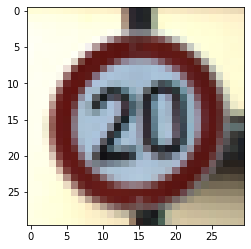

In [5]:
path = "img_class/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

The dataset is now loaded and converted into numpy array

## Train-Test Split on the data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


## Creating a model using Convolutional Nueral Network

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

Metal device set to: Apple M1


2023-04-08 15:05:19.505764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 15:05:19.508466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-08 15:05:19.509911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- We use 2 nets with 32 filters and 2 nets with 64 filters
- We use relu activation functions for the all the nets and use a softmax activation for the last net


## Compiling the model and fitting on the data

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15


2023-04-08 15:05:20.160354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - ETA: 0s - loss: 2.5138 - accuracy: 0.3914

2023-04-08 15:05:33.152327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - 15s 28ms/step - loss: 2.5138 - accuracy: 0.3914 - val_loss: 0.9190 - val_accuracy: 0.7665
Epoch 2/15
491/491 [==============================] - 13s 27ms/step - loss: 1.0772 - accuracy: 0.6831 - val_loss: 0.4887 - val_accuracy: 0.8753
Epoch 3/15
491/491 [==============================] - 14s 28ms/step - loss: 0.7384 - accuracy: 0.7841 - val_loss: 0.2975 - val_accuracy: 0.9230
Epoch 4/15
491/491 [==============================] - 14s 28ms/step - loss: 0.5381 - accuracy: 0.8426 - val_loss: 0.2338 - val_accuracy: 0.9337
Epoch 5/15
491/491 [==============================] - 13s 27ms/step - loss: 0.4238 - accuracy: 0.8749 - val_loss: 0.1520 - val_accuracy: 0.9552
Epoch 6/15
491/491 [==============================] - 13s 27ms/step - loss: 0.3689 - accuracy: 0.8887 - val_loss: 0.1162 - val_accuracy: 0.9671
Epoch 7/15
491/491 [==============================] - 14s 28ms/step - loss: 0.3125 - accuracy: 0.9073 - val_loss: 0.0873 - val_accuracy: 0.9745
Epo

## Plotting the Accuracy & loss curve with each iteration

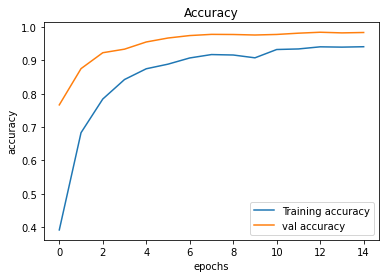

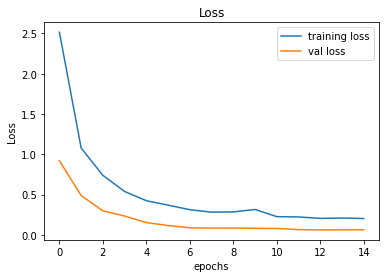

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Computing the accuracy score

In [27]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("img_class/Test.csv")
test_labels = test.ClassId.values
test_img_path = "img_class"
test_imgs = test['Path'].values
test_data = []
#test_labels = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
print(test_labels)
predict_x=model.predict(test_data) 
classes_x=np.argmax(predict_x,axis=1)
#predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, classes_x))

[16  1 38 ...  6  7 10]
accuracy:  0.9536025336500396


## Saving the model

In [13]:
model.save('traffic_classifier.h5')

## Loading the model and defining classes

In [3]:
from keras.models import load_model
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }



Metal device set to: Apple M1


2023-04-13 13:58:52.880506: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 13:58:52.882941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-13 13:58:52.884644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Classifying the image

In [6]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    predict_x=model.predict(image) 
    classes_x=np.argmax(predict_x,axis=1)
    classes_x = classes_x[0]
    sign = classes[classes_x+1]
    print(sign)

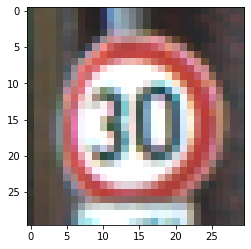

In [8]:
path = "img_class/Test/00001.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [9]:
classify('img_class/Test/00001.png')

Speed limit (30km/h)
